In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from mpl_toolkits.mplot3d import Axes3D
# Set global font properties
plt.rcParams['font.family'] = 'Serif'
plt.rcParams['font.size'] = 10.5

In [ ]:

#Reading raw data from .xslx format
ferment_excel = pd.ExcelFile('/content/5_FermentationData-for-data-analysis_Method1.xlsx')
ferment_raw = pd.read_excel(ferment_excel,index_col = 0)
ferment_raw

Feedstock  Glucose (g/L)  Xylose (g/L)  Aluminum    Calcium  \
0                  Batch #2      88.216724     50.716041   0.097514  9.035365   
1                  Batch #3      88.143296     53.832700   0.071364  9.577470   
2                  Batch #4      65.592171     37.748459   0.073646  9.763851   
3                  Batch #5      51.203734     33.301483   0.031591  4.766730   
4                    cob_R1     145.448340    122.209770   0.041309  3.733935   
5                    cob_R2     128.279760    106.950840   0.041309  3.733935   
6                    cob_R3     113.659410     96.643950   0.041309  3.733935   
7                  Stalk_R1     107.117010     50.071980   0.048014  8.632869   
8                  Stalk_R2     111.027660     52.206960   0.048014  8.632869   
9                  Stalk_R3     108.784800     51.213420   0.048014  8.632869   
10          Whole stover_R1     111.151200     53.710320   0.042681  5.375367   
11          Whole stover_R2     112.562340     54.394140   0.042681  5.375367   
12          Whole stover_R3      65.537970     31.519230   0.042681  5.375367   
13                  Husk_R1      97.006740     54.705600   0.029897  5.789325   
14                  Husk_R2     132.156480     74.408490   0.029897  5.789325   
15                  Husk_R3     126.061260     71.085090   0.029897  5.789325   
16       Synthetic media_R1      88.875720     52.324410        NaN  0.784655   
17       Synthetic media_R2     112.273500     66.100860        NaN  0.784655   
18      Mild self heated_R1     130.935000     71.411340   0.091331  7.441122   
19      Mild self heated_R2     106.744650     58.294350   0.091331  7.441122   
20  Moderate self-heated_R1      71.350440     31.039860   0.104236  6.168927   
21  Moderate self-heated_R2      66.280950     28.766550   0.104236  6.168927   
22    Severe self-heated_R1      78.203430     28.107960   0.092378  6.452173   
23    Severe self-heated_R2      89.699610     31.994250   0.092378  6.452173   

       Iron   Potassium   Magnesium    Sodium   Phosphorus   Silicon   \
0   1.826678    0.966936  10.075643  13.073590     0.735910  3.299674   
1   1.640812    0.821607   9.360375   6.072627     0.554930  3.476632   
2   1.725140    0.967571   6.102252   5.274708     0.577510  4.295699   
3   0.268503    0.601022   2.225309   3.980144     0.419250  2.873143   
4   0.161433    1.671897   2.723353  15.406699     0.454008  1.336799   
5   0.161433    1.671897   2.723353  15.406699     0.454008  1.336799   
6   0.161433    1.671897   2.723353  15.406699     0.454008  1.336799   
7   0.709187    1.699268   6.381158   9.457532     1.475806  3.096203   
8   0.709187    1.699268   6.381158   9.457532     1.475806  3.096203   
9   0.709187    1.699268   6.381158   9.457532     1.475806  3.096203   
10  0.495226    0.756536   3.795765   4.451325     0.707699  2.687449   
11  0.495226    0.756536   3.795765   4.451325     0.707699  2.687449   
12  0.495226    0.756536   3.795765   4.451325     0.707699  2.687449   
13  0.380409    0.533316   3.560423   3.974366     0.453696  2.933289   
14  0.380409    0.533316   3.560423   3.974366     0.453696  2.933289   
15  0.380409    0.533316   3.560423   3.974366     0.453696  2.933289   
16  0.000870    6.393540   3.613977   1.489551     6.393016  0.000000   
17  0.000870    6.393540   3.613977   1.489551     6.393016  0.000000   
18  1.743364    0.789225   5.506782   3.326391     0.493466  2.462097   
19  1.743364    0.789225   5.506782   3.326391     0.493466  2.462097   
20  1.380510    0.682639   3.852679   2.441060     0.389589  2.045180   
21  1.380510    0.682639   3.852679   2.441060     0.389589  2.045180   
22  0.967602    0.819189   3.416776   3.245004     0.447711  2.482430   
23  0.967602    0.819189   3.416776   3.245004     0.447711  2.482430   

       Sulfur  Growth rate (h-1)  Bisabolene produced (g/L)  \
0   11.536387           0.065802                   1.864588   
1    0.687976           0.061219        

In [ ]:
ferment = ferment_raw.copy()
ferment.columns

Index(['Feedstock', 'Glucose (g/L)', 'Xylose (g/L)', 'Aluminum ', 'Calcium',
       'Iron ', 'Potassium ', 'Magnesium', 'Sodium ', 'Phosphorus ',
       'Silicon ', 'Sulfur', 'Growth rate (h-1)', 'Bisabolene produced (g/L)',
       'Glucose consumed (g/L)', 'Xylose consumed (g/L)'],
      dtype='object')

In [ ]:
hydro_comp_whole = ferment[['Glucose (g/L)', 'Xylose (g/L)', 'Aluminum ', 'Calcium',
       'Iron ', 'Potassium ', 'Magnesium', 'Sodium ', 'Phosphorus ',
       'Silicon ', 'Sulfur']]
whole_col = ['Glucose (g/L)', 'Xylose (g/L)', 'Aluminum ', 'Calcium',
       'Iron ', 'Potassium ', 'Magnesium', 'Sodium ', 'Phosphorus ',
       'Silicon ', 'Sulfur']
result_whole = ferment[['Growth rate (h-1)', 'Bisabolene produced (g/L)',
       'Glucose consumed (g/L)', 'Xylose consumed (g/L)']]
result_col = ['Growth rate (h-1)', 'Bisabolene produced (g/L)',
       'Glucose consumed (g/L)', 'Xylose consumed (g/L)']

-----------------------------------
## **Whole Data**

19


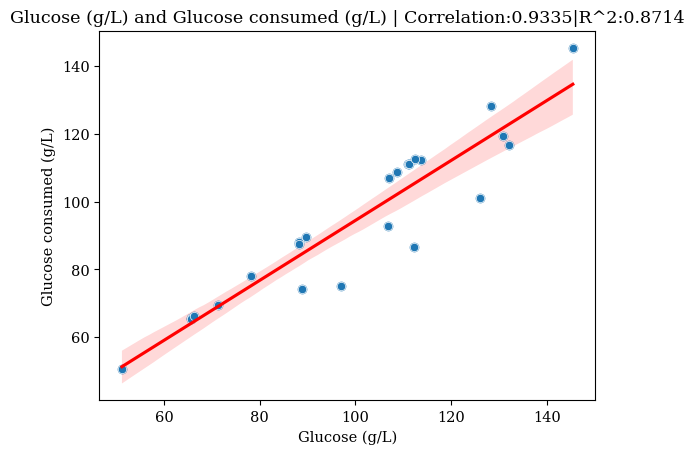

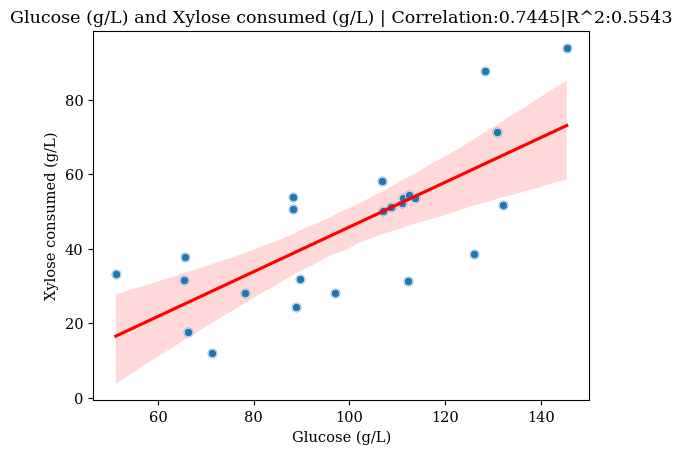

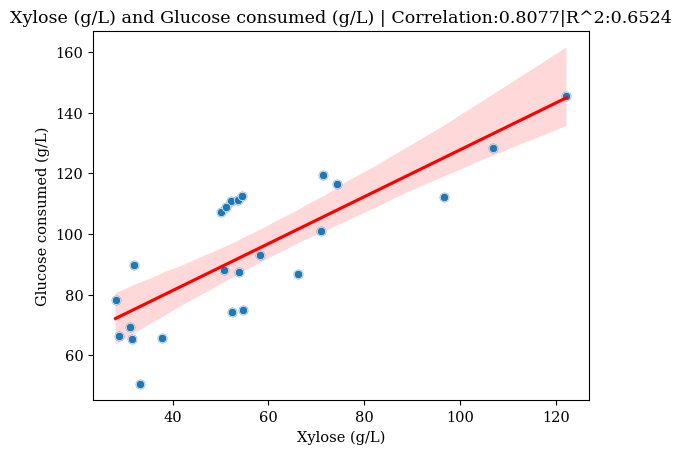

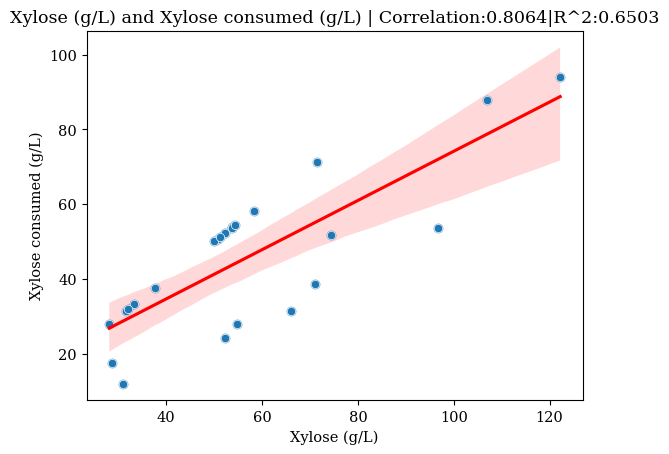

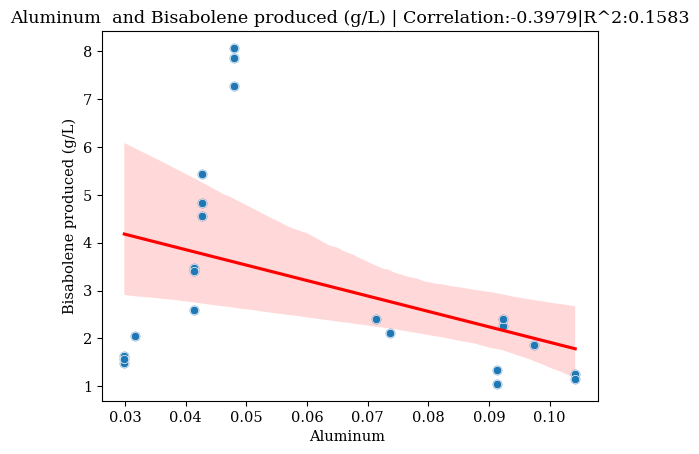

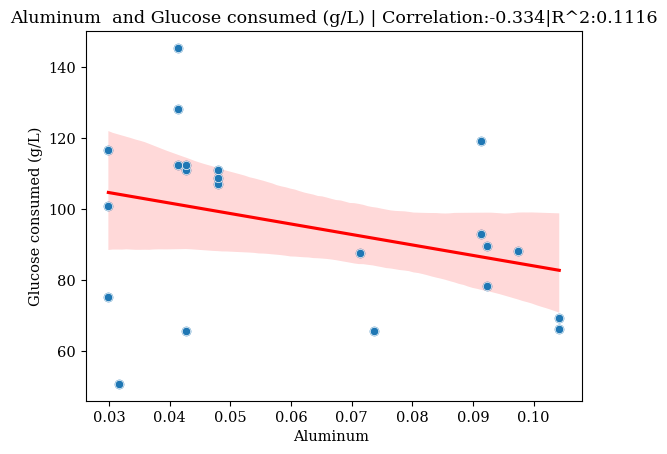

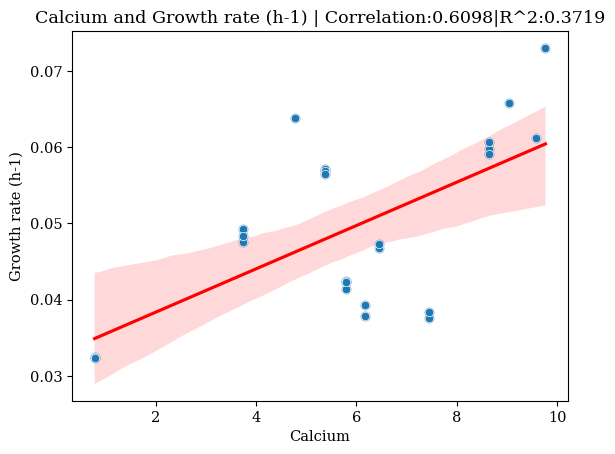

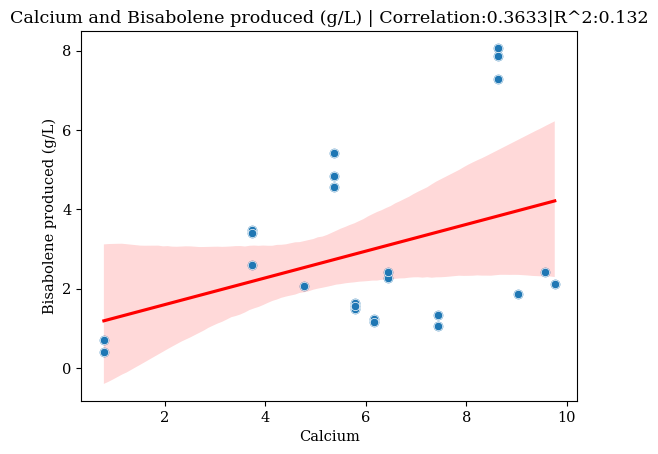

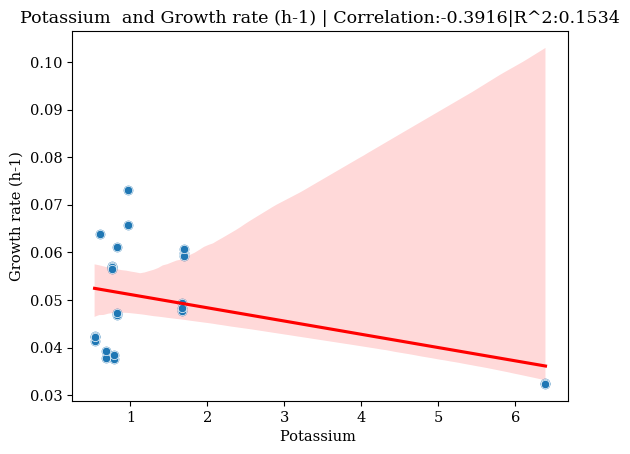

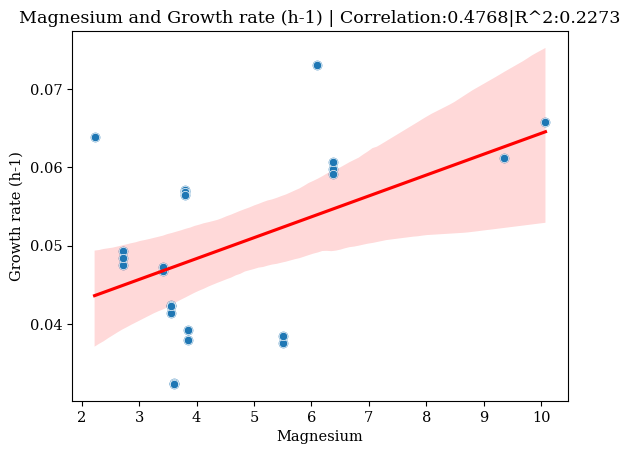

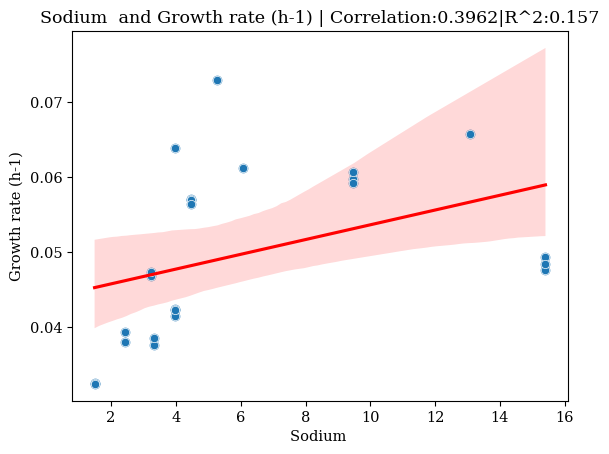

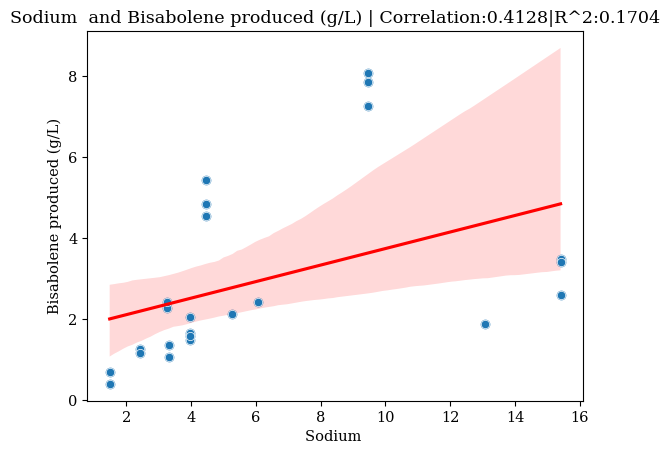

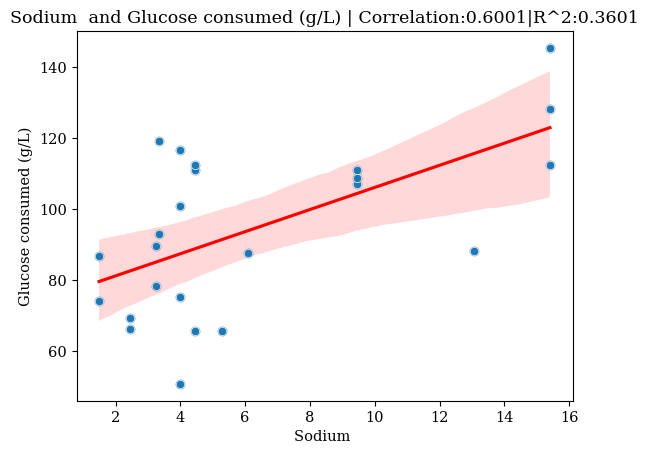

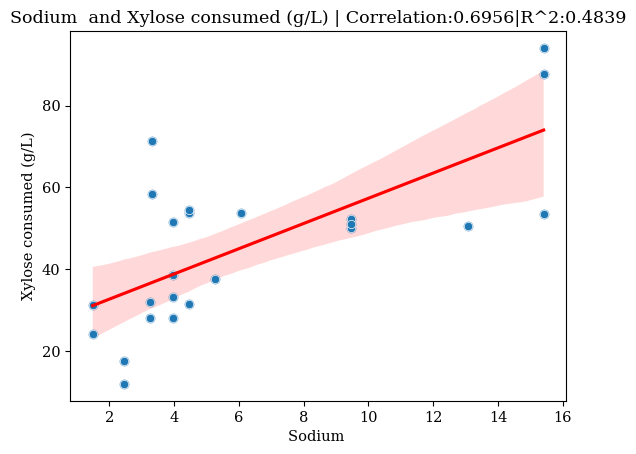

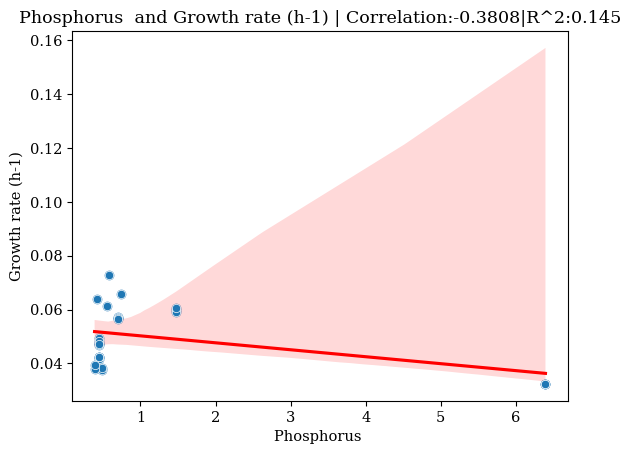

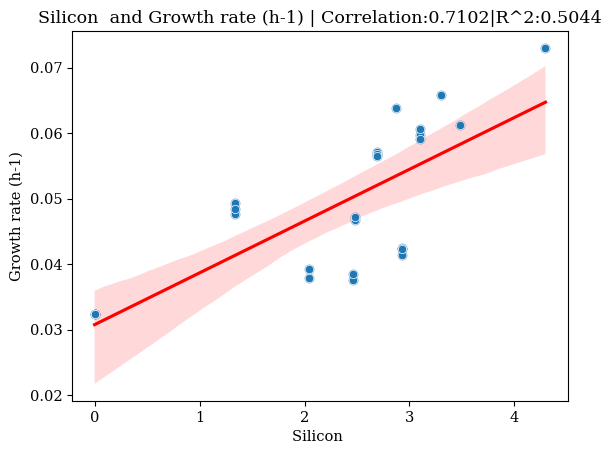

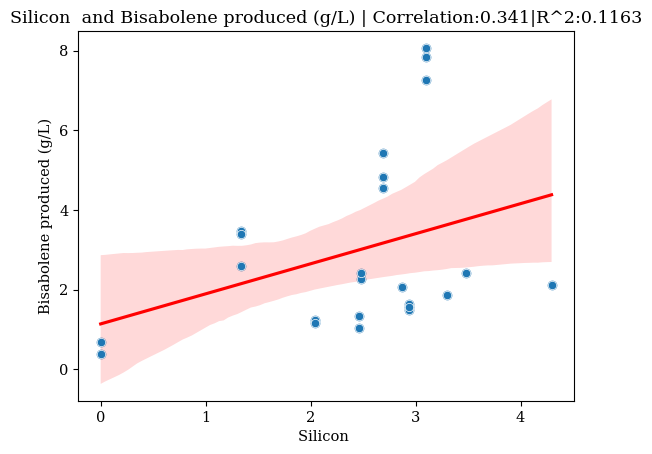

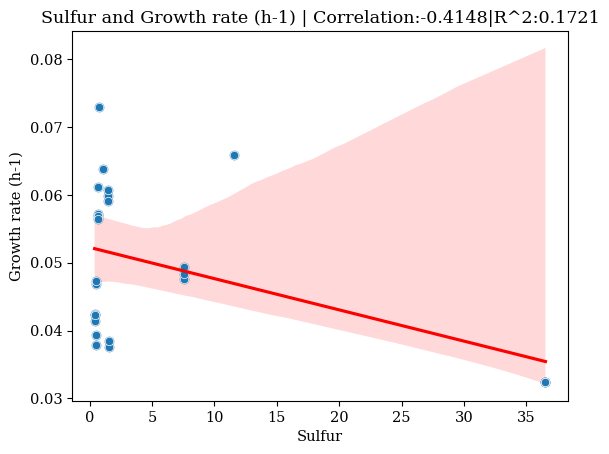

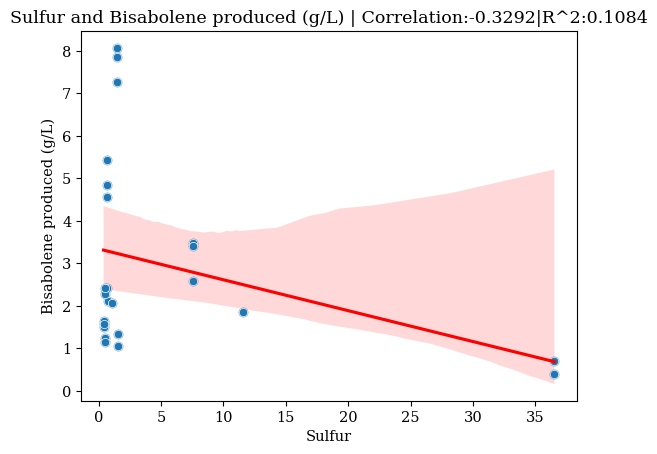

In [ ]:
#Correlation for whole data between growth rate, sugar consumption and bisabolene data to composition of hydrolysate. Correlations with absolute value more than 0.33 shown.
counter = 0
for i in range(len(whole_col)):
  for j in range(len(result_col)):
    col1 = whole_col[i]
    col2 = result_col[j]
    try:
            hydro_comp_whole.loc[:,col1] = hydro_comp_whole.loc[:,col1].astype(float)
            result_whole.loc[:,col2] = result_whole.loc[:,col2].astype(float)
    except ValueError:
          continue
    if hydro_comp_whole[col1].dtype == 'float64' and result_whole[col2].dtype == 'float64':
      correlation = round(ferment[[col1, col2]].corr().iloc[0,1],4)
      if abs(correlation * correlation) > 0.1:
        counter+=1
        plt.figure()
        sns.regplot(data=ferment, x=col1, y=col2, line_kws={'color': 'red'})
        plt.title(f'{col1} and {col2} | Correlation:{correlation}|R^2:{np.round(correlation**2,4)}')
        sns.scatterplot(data=ferment,x=col1,y=col2)
print(counter)

Text(0.5, 1.0, 'Heatmap of Correlations')

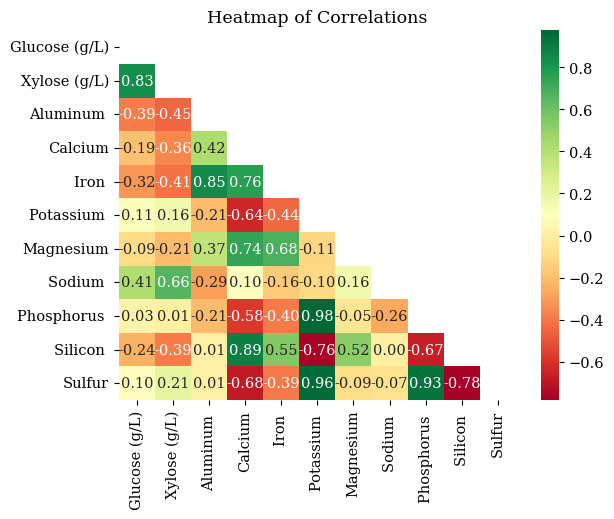

In [ ]:
#all correlations between each column in dataset
float_columns = hydro_comp_whole.select_dtypes(include=['float64']).columns
corr_matrix = hydro_comp_whole[float_columns].corr()
#.where(np.abs(corr_matrix) >= 0.2,0)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',mask=mask)
plt.title('Heatmap of Correlations')

Text(0.5, 1.0, 'Heatmap of R^2 Scores')

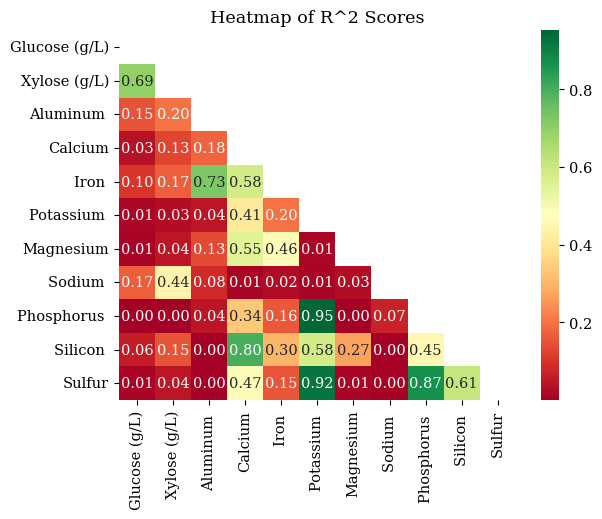

In [ ]:
#all correlations between each column in dataset
float_columns = hydro_comp_whole.select_dtypes(include=['float64']).columns
r2_matrix = hydro_comp_whole[float_columns].corr()**2
#.where(np.abs(corr_matrix) >= 0.2,0)
mask = np.triu(np.ones_like(r2_matrix, dtype=bool))
sns.heatmap(r2_matrix, annot=True, fmt='.2f', cmap='RdYlGn',mask=mask)
plt.title('Heatmap of R^2 Scores')

-----------------------------------
## **Batch Data**

In [ ]:
ferment_batch = ferment[ferment['Feedstock'].isin(['Batch #2','Batch #3','Batch #4','Batch #5'])]
ferment_batch

Feedstock  Glucose (g/L)  Xylose (g/L)  Aluminum    Calcium     Iron   \
0  Batch #2      88.216724     50.716041   0.097514  9.035365  1.826678   
1  Batch #3      88.143296     53.832700   0.071364  9.577470  1.640812   
2  Batch #4      65.592171     37.748459   0.073646  9.763851  1.725140   
3  Batch #5      51.203734     33.301483   0.031591  4.766730  0.268503   

   Potassium   Magnesium    Sodium   Phosphorus   Silicon      Sulfur  \
0    0.966936  10.075643  13.073590      0.73591  3.299674  11.536387   
1    0.821607   9.360375   6.072627      0.55493  3.476632   0.687976   
2    0.967571   6.102252   5.274708      0.57751  4.295699   0.774683   
3    0.601022   2.225309   3.980144      0.41925  2.873143   1.082760   

   Growth rate (h-1)  Bisabolene produced (g/L)  Glucose consumed (g/L)  \
0           0.065802                   1.864588               88.216724   
1           0.061219                   2.412877               87.599836   
2           0.073002                   2.122396               65.592171   
3           0.063862                   2.058461               50.689245   

   Xylose consumed (g/L)  
0              50.716041  
1              53.832700  
2              37.748459  
3              33.277210

In [ ]:
hydro_comp_batch = ferment_batch[['Glucose (g/L)', 'Xylose (g/L)', 'Aluminum ', 'Calcium',
       'Iron ', 'Potassium ', 'Magnesium', 'Sodium ', 'Phosphorus ',
       'Silicon ', 'Sulfur']]
result_batch = ferment_batch[['Growth rate (h-1)', 'Bisabolene produced (g/L)',
       'Glucose consumed (g/L)', 'Xylose consumed (g/L)']]


<ipython-input-23-f5296377e080>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


27


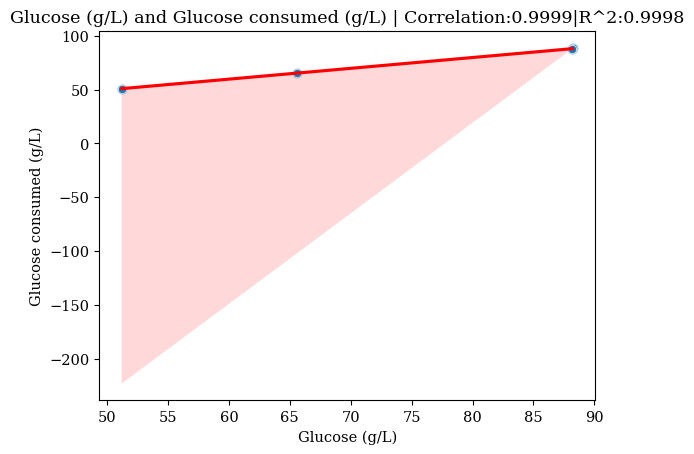

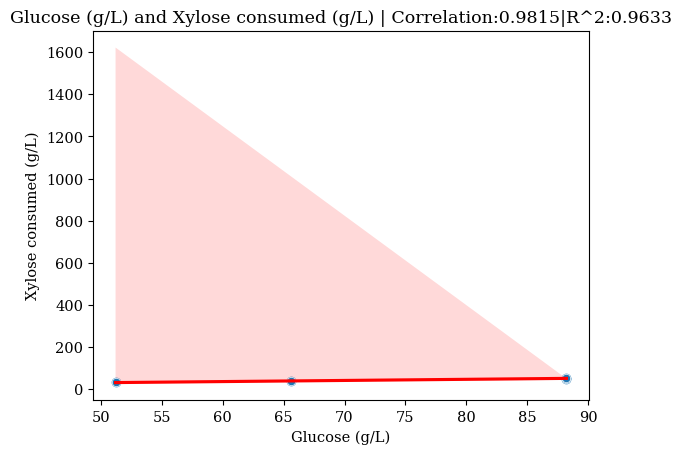

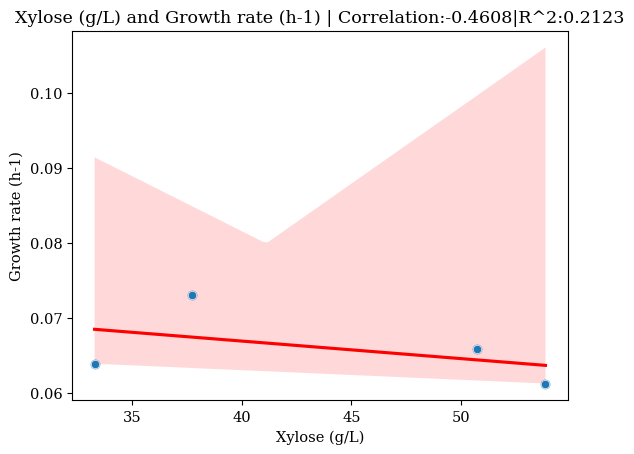

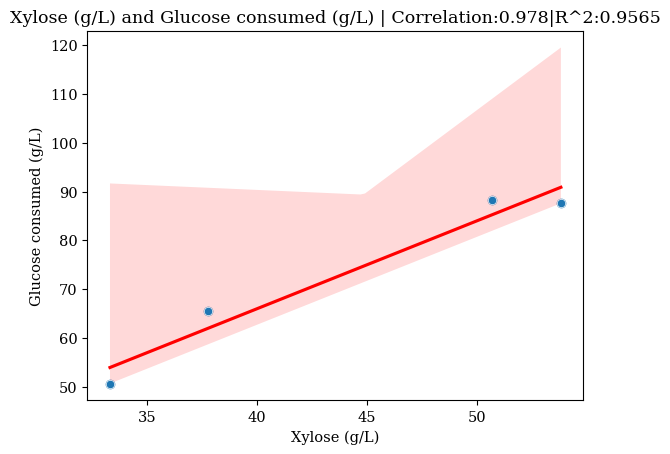

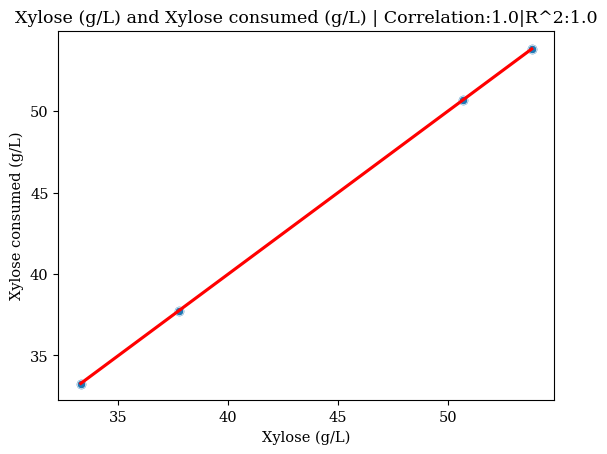

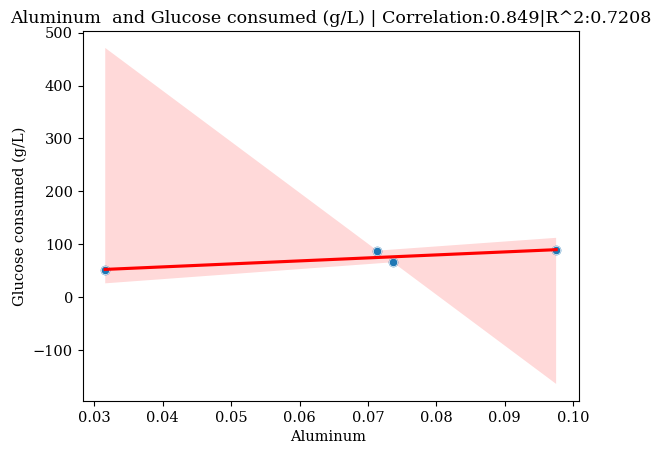

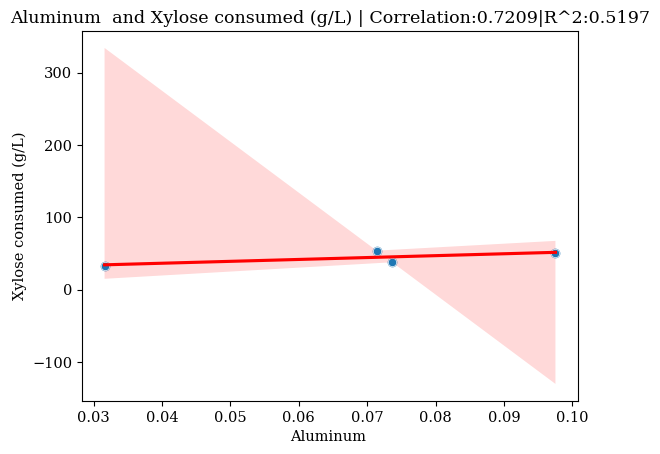

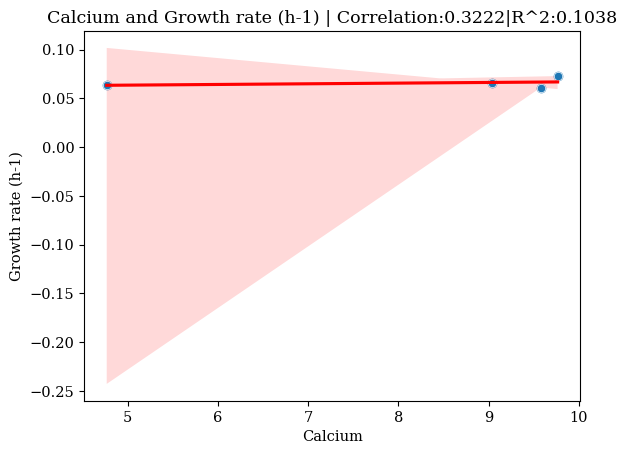

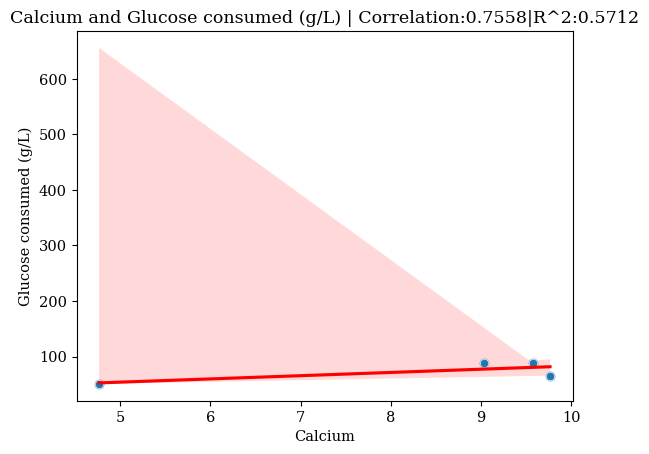

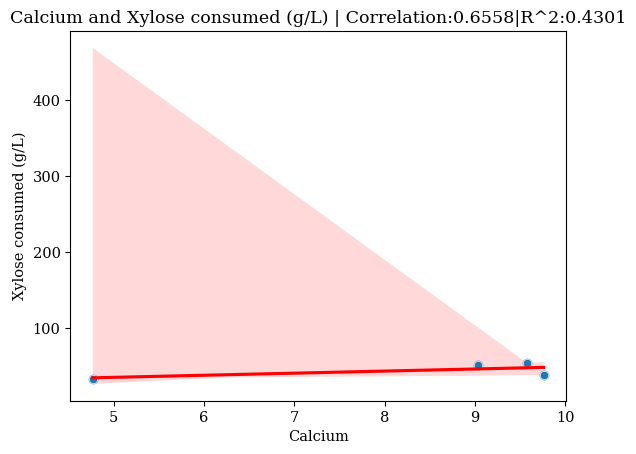

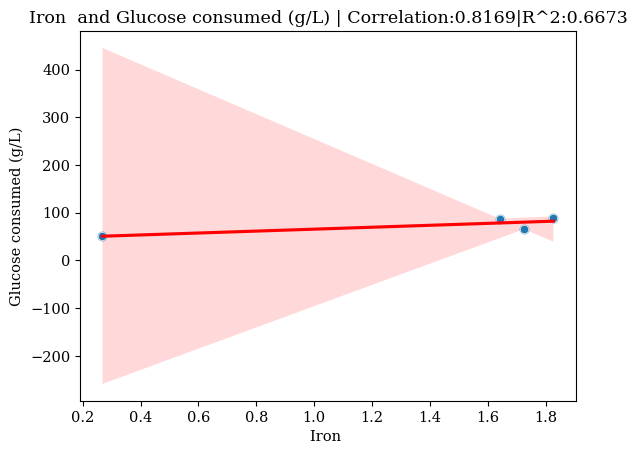

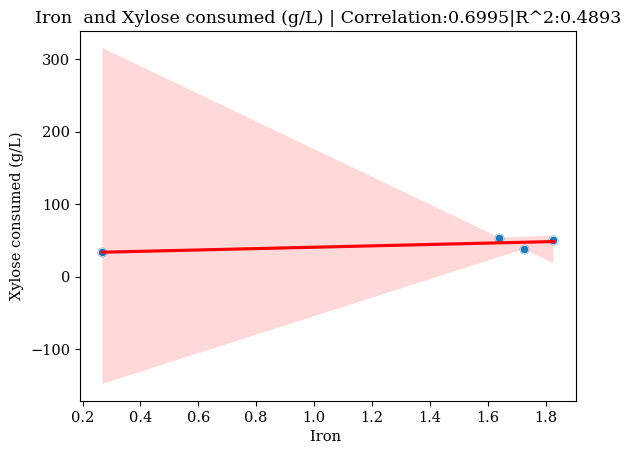

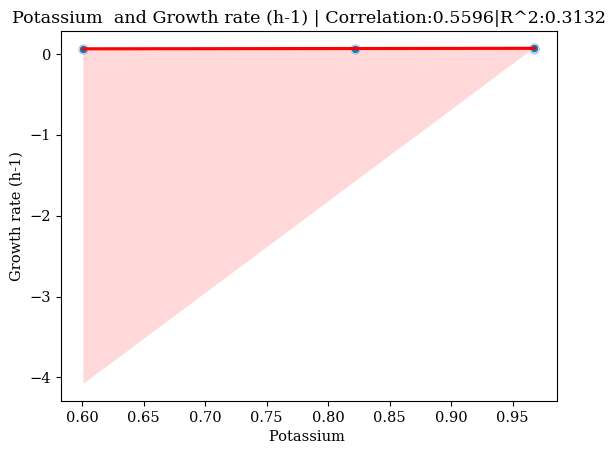

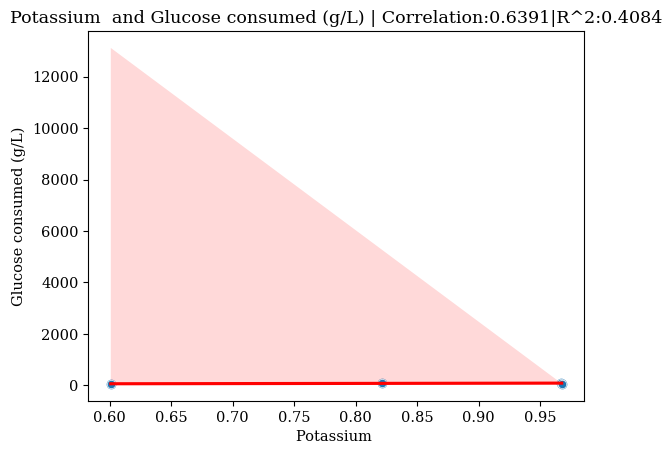

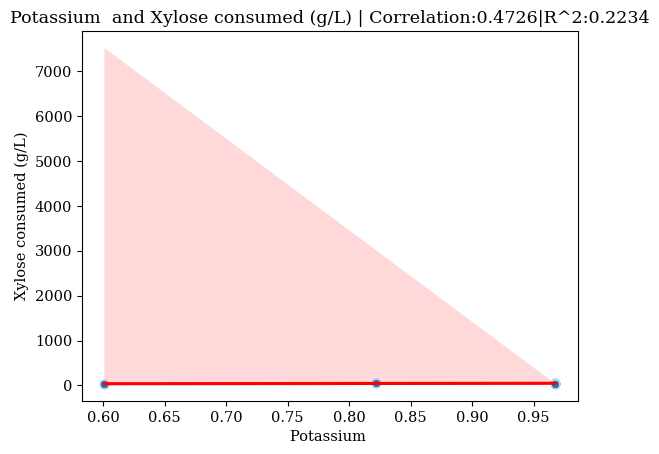

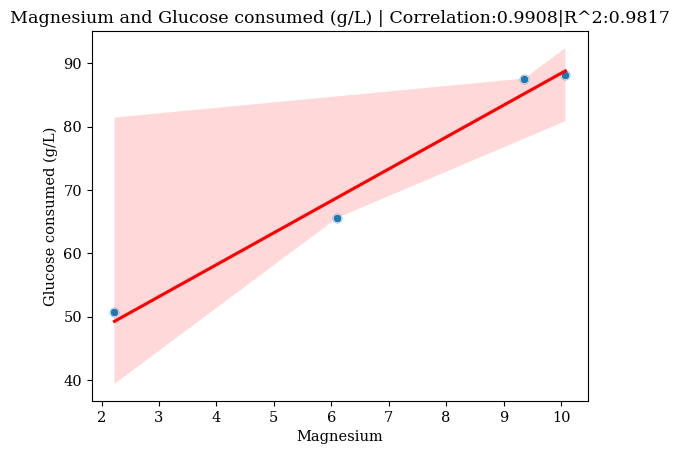

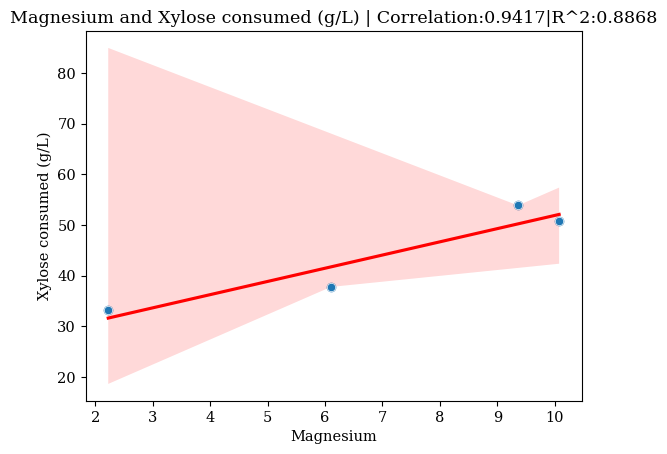

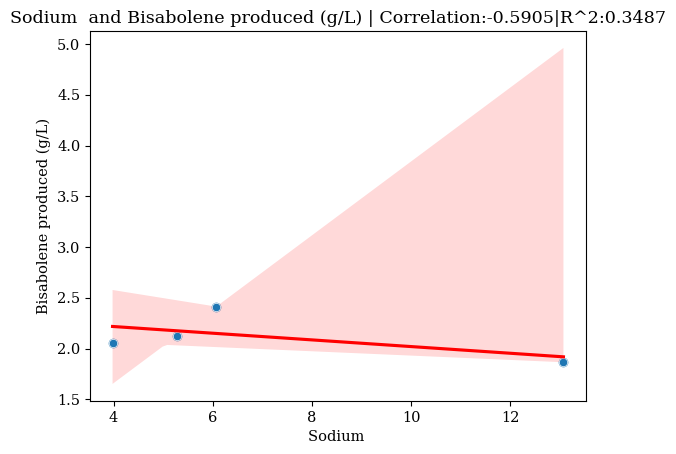

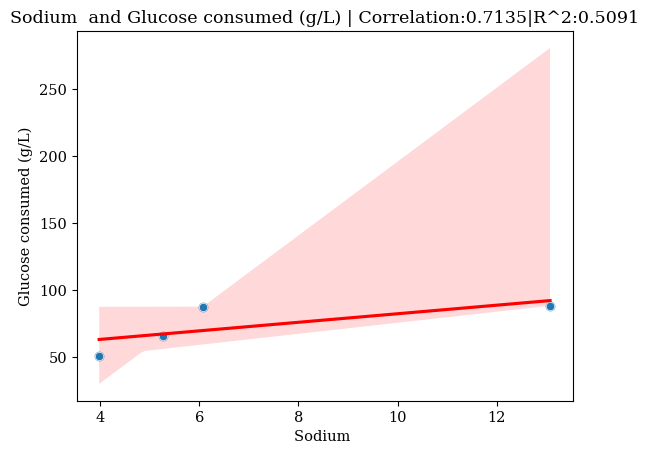

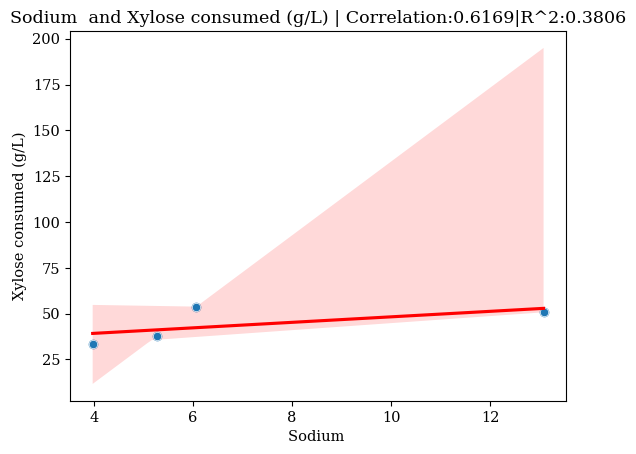

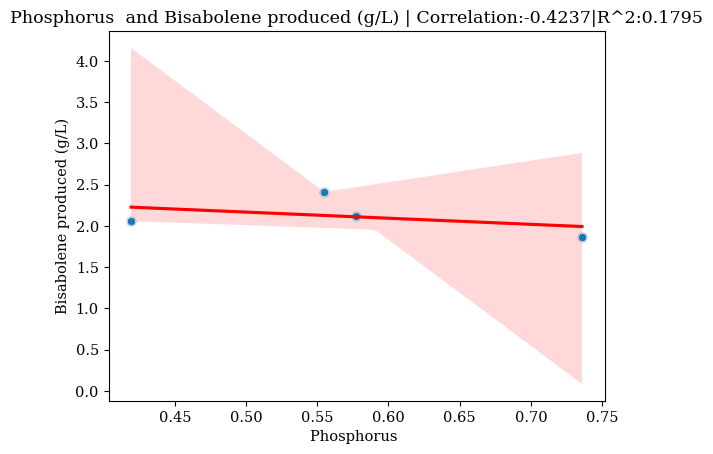

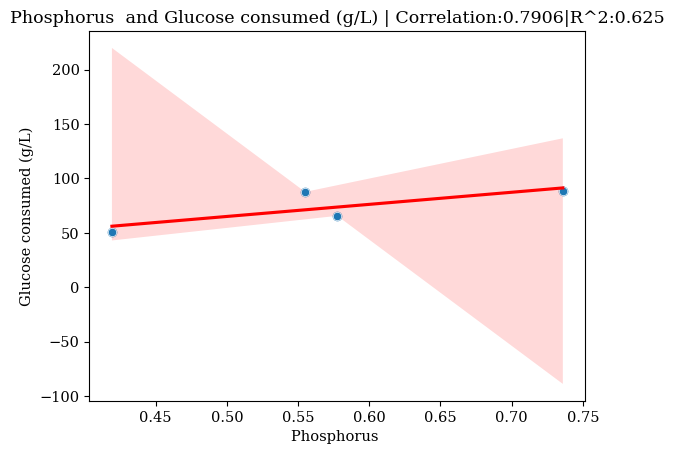

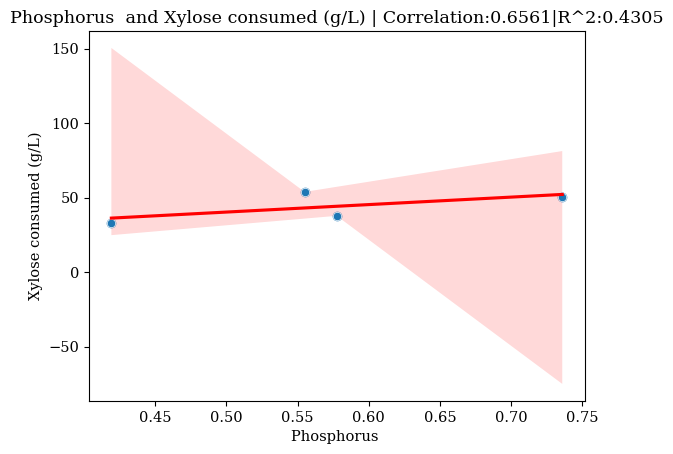

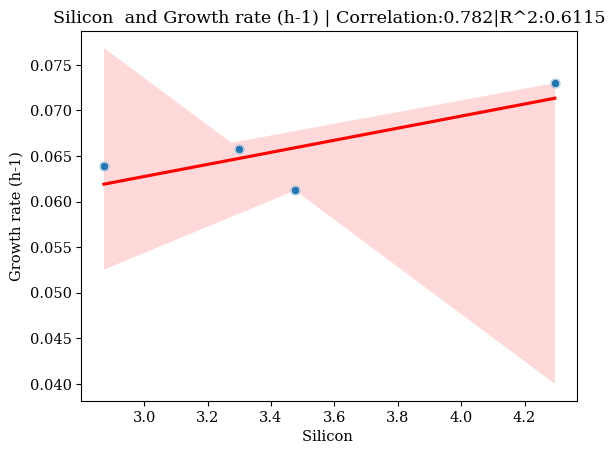

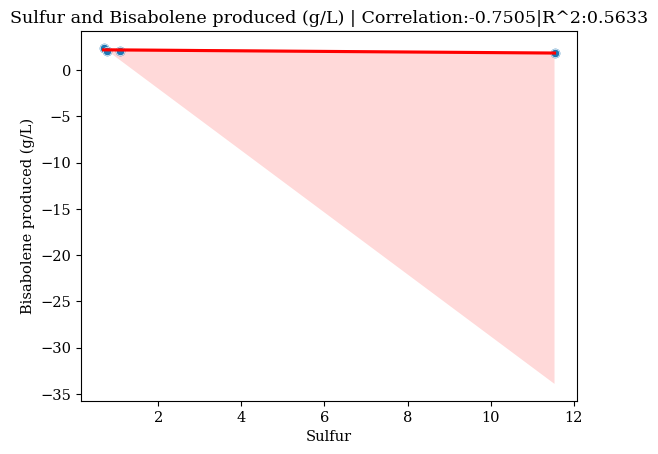

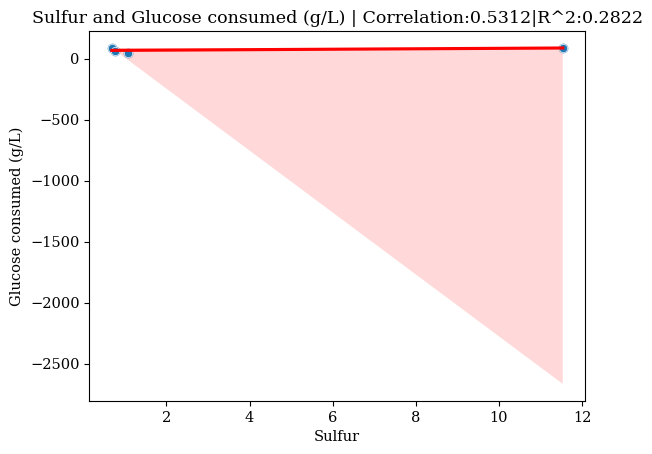

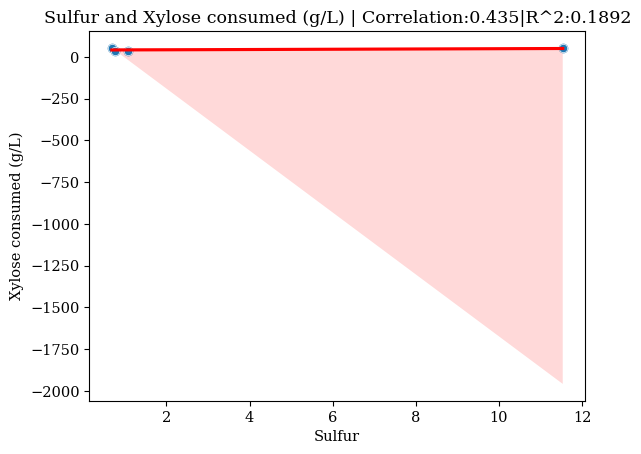

In [ ]:
#Correlation for batch data between growth rate, sugar consumption and bisabolene data to composition of hydrolysate. Correlations with absolute value more than 0.33 shown.
counter = 0
for i in range(len(whole_col)):
  for j in range(len(result_col)):
    col1 = whole_col[i]
    col2 = result_col[j]
    try:
            hydro_comp_batch.loc[:,col1] = hydro_comp_batch.loc[:,col1].astype(float)
            result_batch.loc[:,col2] = result_batch.loc[:,col2].astype(float)
    except ValueError:
          continue
    if hydro_comp_batch[col1].dtype == 'float64' and result_batch[col2].dtype == 'float64':
      correlation = round(ferment_batch[[col1, col2]].corr().iloc[0,1],4)
      if abs(correlation*correlation) > 0.1:
        counter+=1
        plt.figure()
        sns.regplot(data=ferment_batch, x=col1, y=col2, line_kws={'color': 'red'})
        plt.title(f'{col1} and {col2} | Correlation:{correlation}|R^2:{np.round(correlation**2,4)}')
        sns.scatterplot(data=ferment_batch,x=col1,y=col2)
print(counter)

Text(0.5, 1.0, 'Heatmap of Correlations')

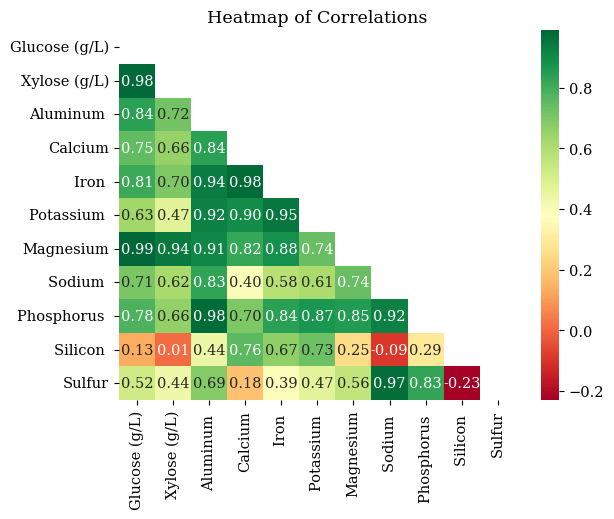

In [ ]:
#all correlations between each column in dataset
float_columns = hydro_comp_batch.select_dtypes(include=['float64']).columns
corr_matrix = hydro_comp_batch[float_columns].corr()
#.where(np.abs(corr_matrix) >= 0.2,0)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',mask=mask)
plt.title('Heatmap of Correlations')

Text(0.5, 1.0, 'Heatmap of Correlations')

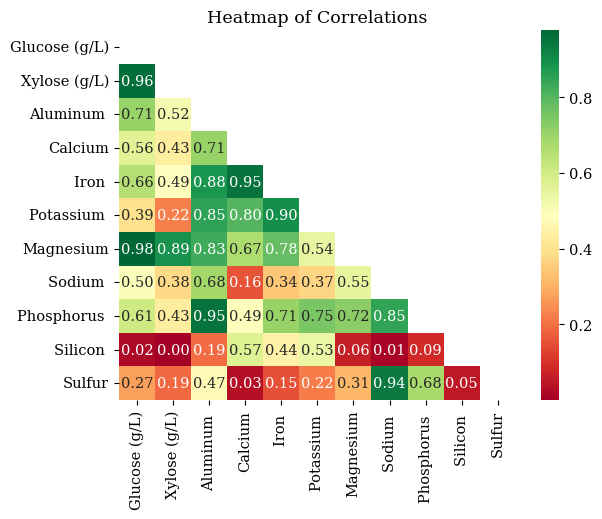

In [ ]:
#all correlations between each column in dataset
float_columns = hydro_comp_batch.select_dtypes(include=['float64']).columns
r2_matrix = hydro_comp_batch[float_columns].corr()**2
#.where(np.abs(corr_matrix) >= 0.2,0)
mask = np.triu(np.ones_like(r2_matrix, dtype=bool))
sns.heatmap(r2_matrix, annot=True, fmt='.2f', cmap='RdYlGn',mask=mask)
plt.title('Heatmap of Correlations')

-----------------------------------
## **Anatomical Fraction Data**

In [ ]:
ferment_fraction = ferment[ferment['Feedstock'].isin(['cob_R1','cob_R2','cob_R3','Stalk_R1','Stalk_R2','Stalk_R3','Whole stover_R1','Whole stover_R2','Whole stover_R3','Husk_R1','Husk_R2','Husk_R3'])]
ferment_fraction

Feedstock  Glucose (g/L)  Xylose (g/L)  Aluminum    Calcium  \
4            cob_R1      145.44834     122.20977   0.041309  3.733935   
5            cob_R2      128.27976     106.95084   0.041309  3.733935   
6            cob_R3      113.65941      96.64395   0.041309  3.733935   
7          Stalk_R1      107.11701      50.07198   0.048014  8.632869   
8          Stalk_R2      111.02766      52.20696   0.048014  8.632869   
9          Stalk_R3      108.78480      51.21342   0.048014  8.632869   
10  Whole stover_R1      111.15120      53.71032   0.042681  5.375367   
11  Whole stover_R2      112.56234      54.39414   0.042681  5.375367   
12  Whole stover_R3       65.53797      31.51923   0.042681  5.375367   
13          Husk_R1       97.00674      54.70560   0.029897  5.789325   
14          Husk_R2      132.15648      74.40849   0.029897  5.789325   
15          Husk_R3      126.06126      71.08509   0.029897  5.789325   

       Iron   Potassium   Magnesium    Sodium   Phosphorus   Silicon   \
4   0.161433    1.671897   2.723353  15.406699     0.454008  1.336799   
5   0.161433    1.671897   2.723353  15.406699     0.454008  1.336799   
6   0.161433    1.671897   2.723353  15.406699     0.454008  1.336799   
7   0.709187    1.699268   6.381158   9.457532     1.475806  3.096203   
8   0.709187    1.699268   6.381158   9.457532     1.475806  3.096203   
9   0.709187    1.699268   6.381158   9.457532     1.475806  3.096203   
10  0.495226    0.756536   3.795765   4.451325     0.707699  2.687449   
11  0.495226    0.756536   3.795765   4.451325     0.707699  2.687449   
12  0.495226    0.756536   3.795765   4.451325     0.707699  2.687449   
13  0.380409    0.533316   3.560423   3.974366     0.453696  2.933289   
14  0.380409    0.533316   3.560423   3.974366     0.453696  2.933289   
15  0.380409    0.533316   3.560423   3.974366     0.453696  2.933289   

      Sulfur  Growth rate (h-1)  Bisabolene produced (g/L)  \
4   7.530320           0.047603                   2.592339   
5   7.530320           0.049307                   3.477216   
6   7.530320           0.048395                   3.399656   
7   1.483046           0.059787                   7.274809   
8   1.483046           0.059164                   8.067510   
9   1.483046           0.060699                   7.852228   
10  0.666193           0.057108                   4.833677   
11  0.666193           0.056887                   4.554450   
12  0.666193           0.056436                   5.426669   
13  0.389536           0.041471                   1.644039   
14  0.389536           0.042431                   1.491006   
15  0.389536           0.042286                   1.574134   

    Glucose consumed (g/L)  Xylose consumed (g/L)  
4                145.44834               94.04874  
5                128.27976               87.74385  
6                112.29612               53.59113  
7                107.11701               50.07198  
8                111.02766               52.20696  
9                108.78480               51.21342  
10               111.15120               53.71032  
11               112.56234               54.39414  
12                65.53797               31.51923  
13                75.08970               28.08273  
14               116.58174               51.65973  
15               100.94262               38.69412

In [ ]:
hydro_comp_fraction = ferment_fraction[['Glucose (g/L)', 'Xylose (g/L)', 'Aluminum ', 'Calcium',
       'Iron ', 'Potassium ', 'Magnesium', 'Sodium ', 'Phosphorus ',
       'Silicon ', 'Sulfur']]
result_batch = ferment_fraction[['Growth rate (h-1)', 'Bisabolene produced (g/L)',
       'Glucose consumed (g/L)', 'Xylose consumed (g/L)']]


<ipython-input-28-7c6f6c1f441b>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


32


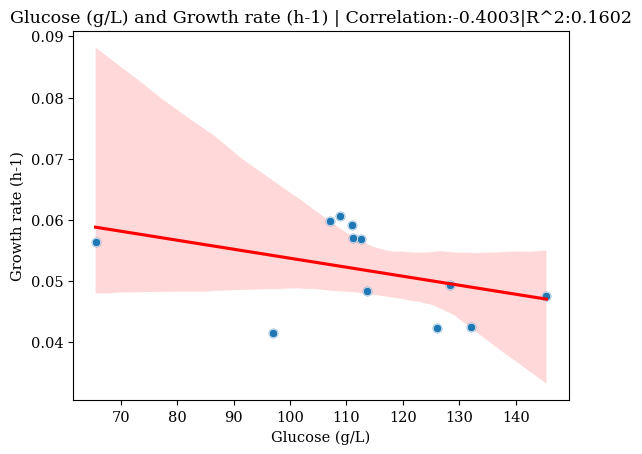

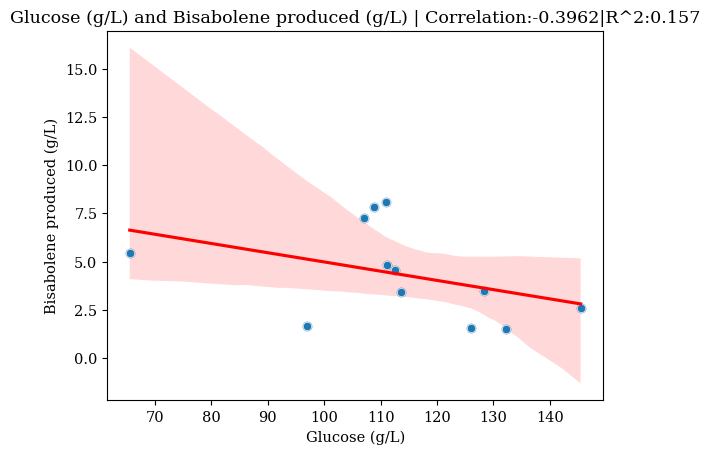

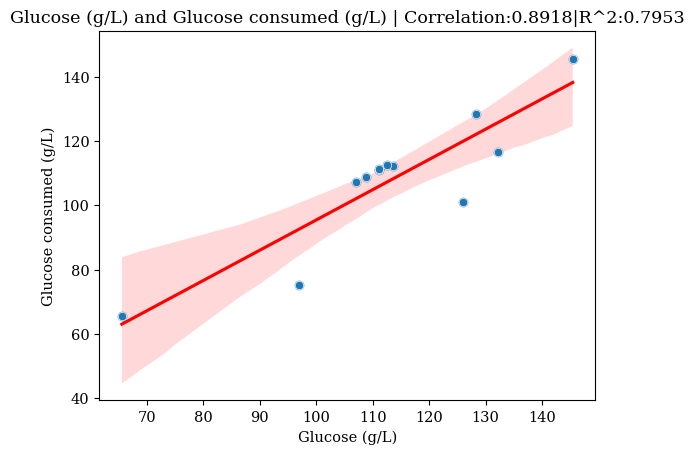

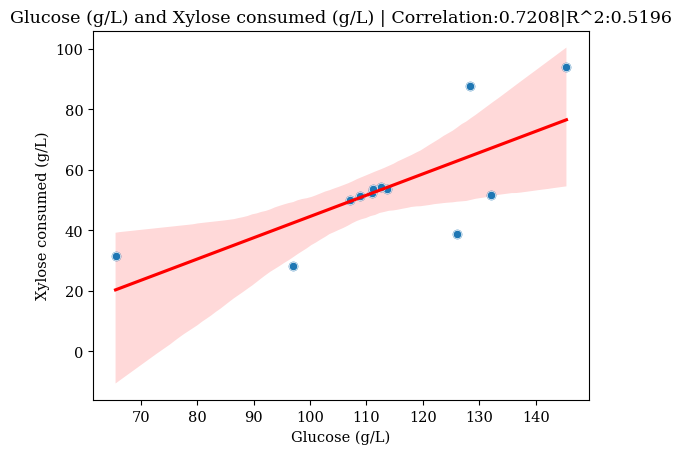

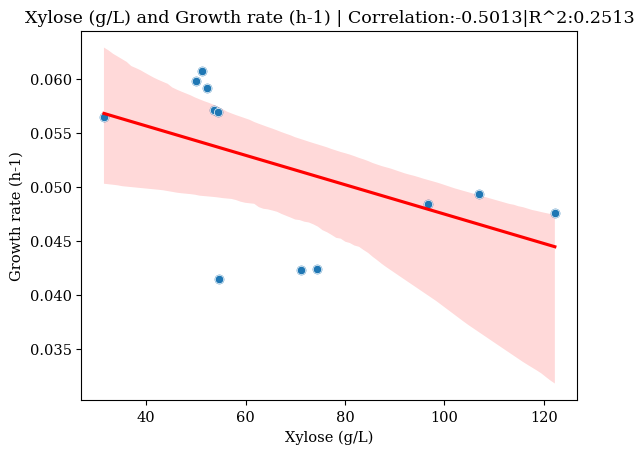

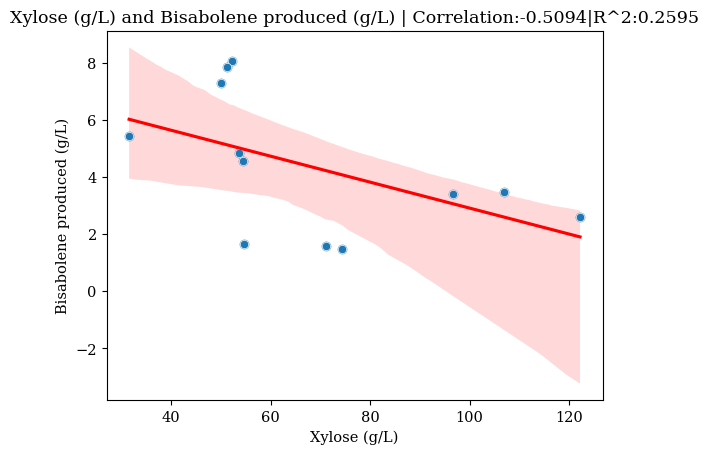

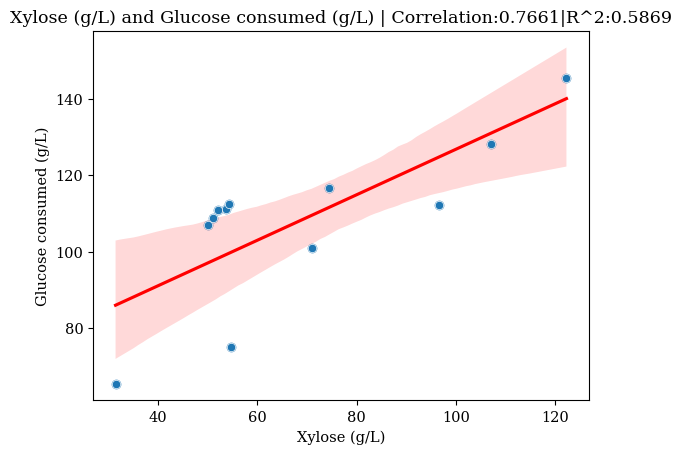

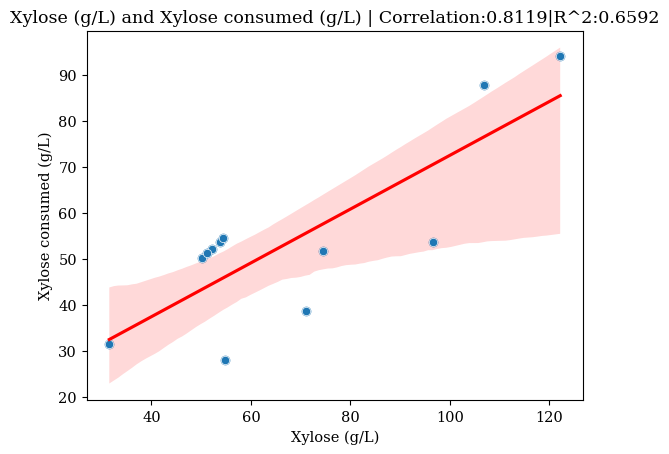

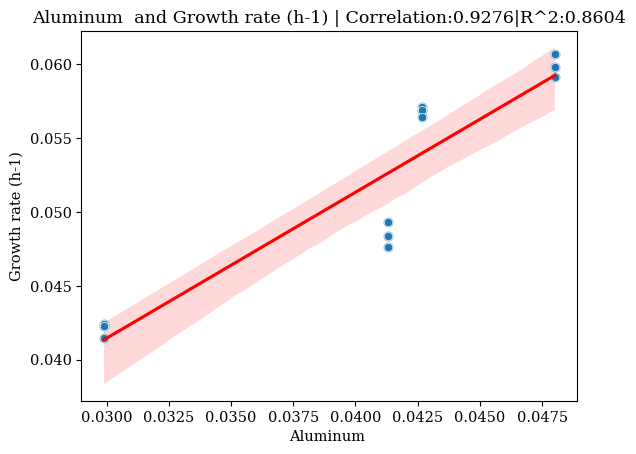

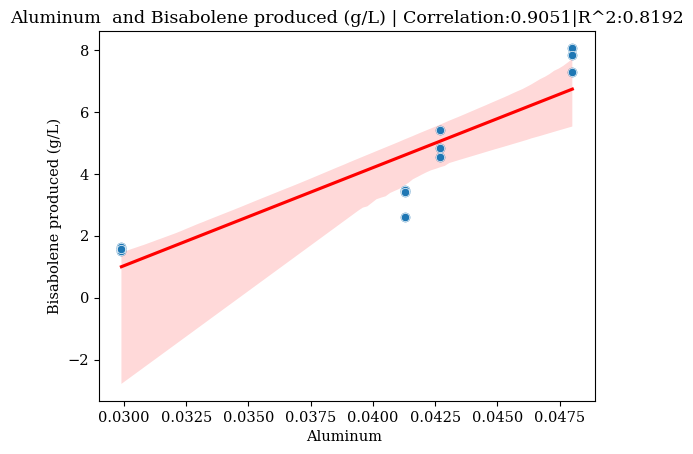

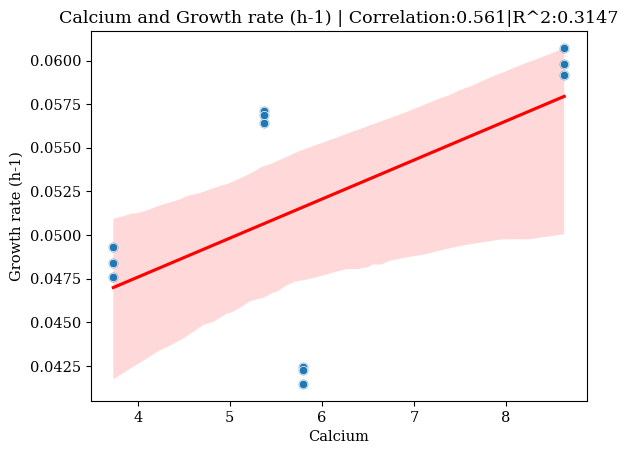

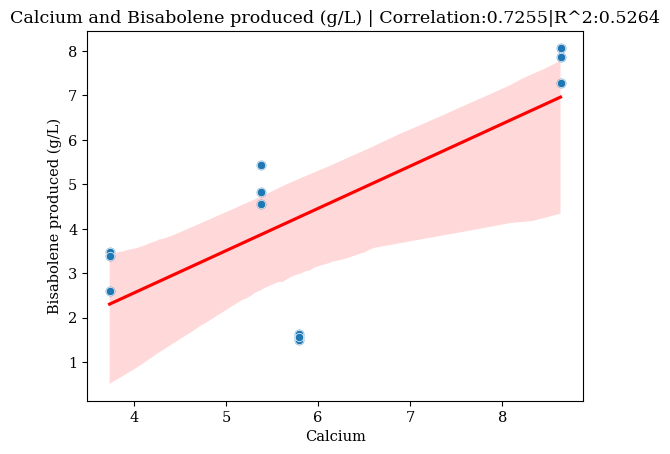

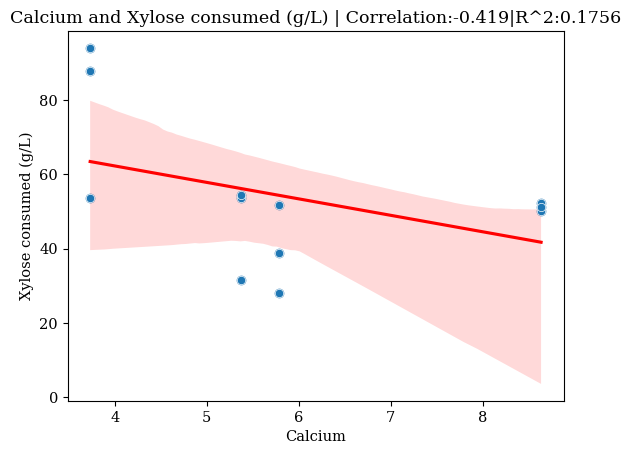

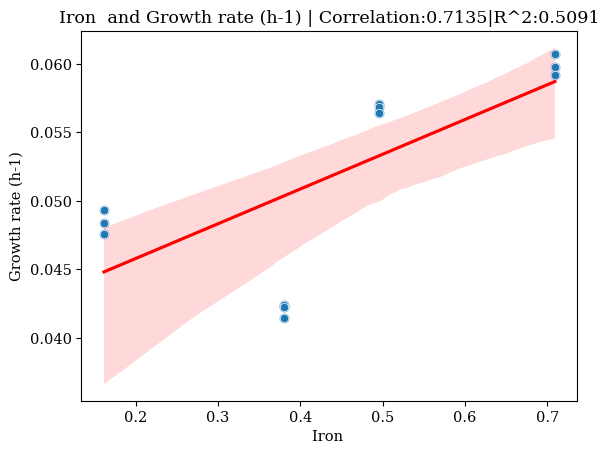

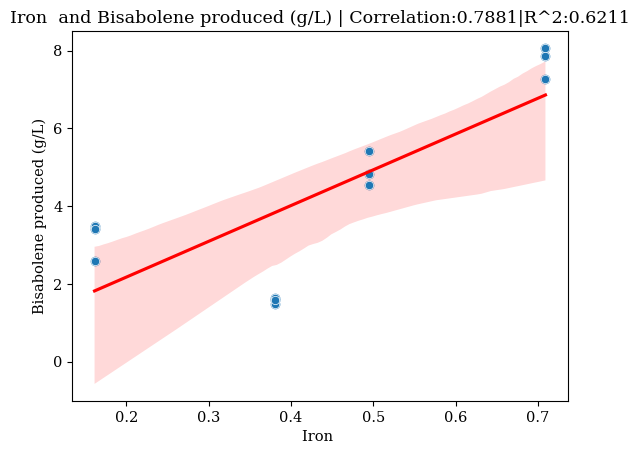

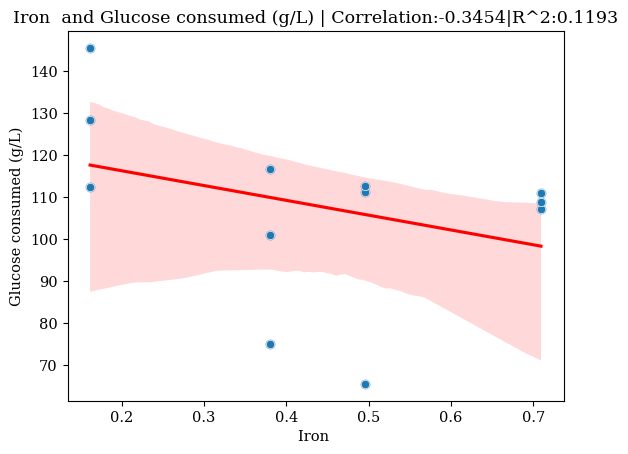

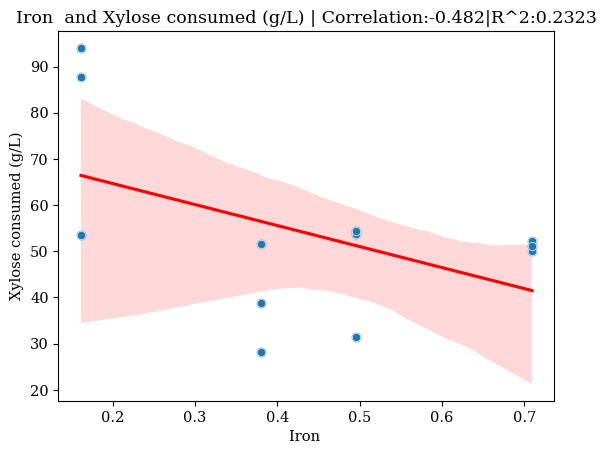

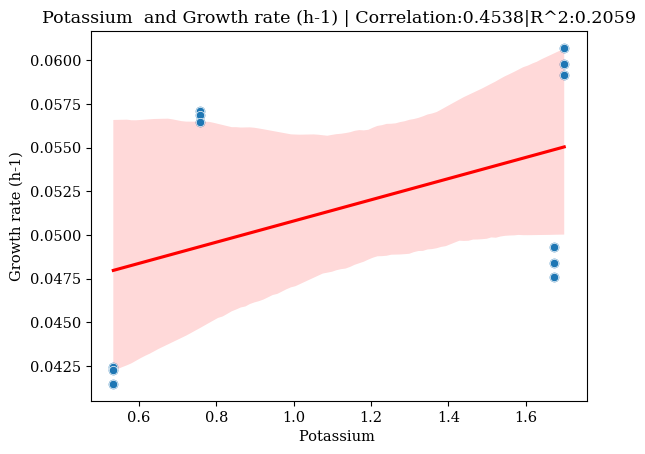

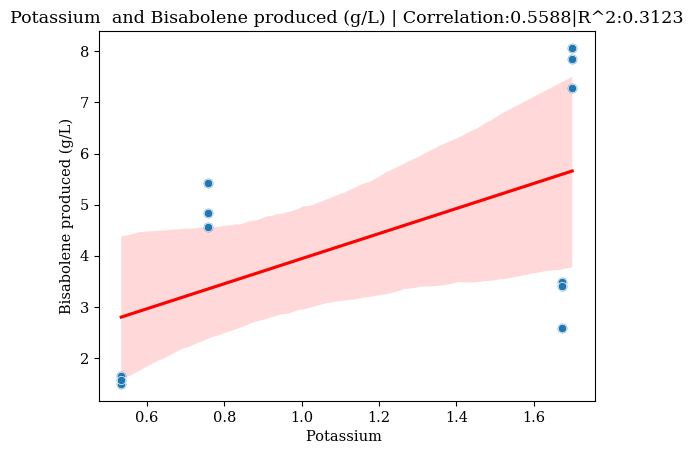

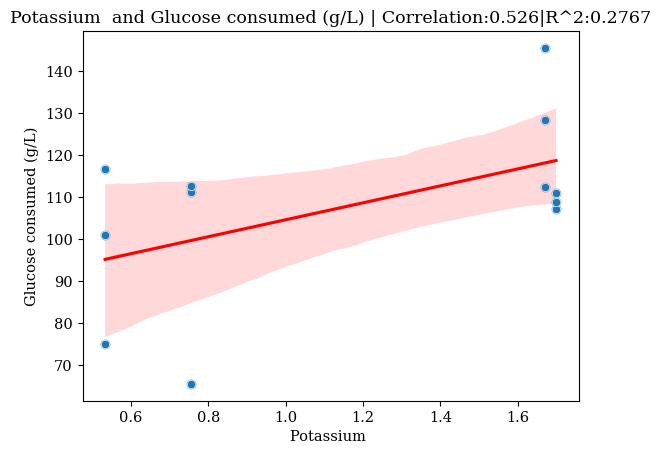

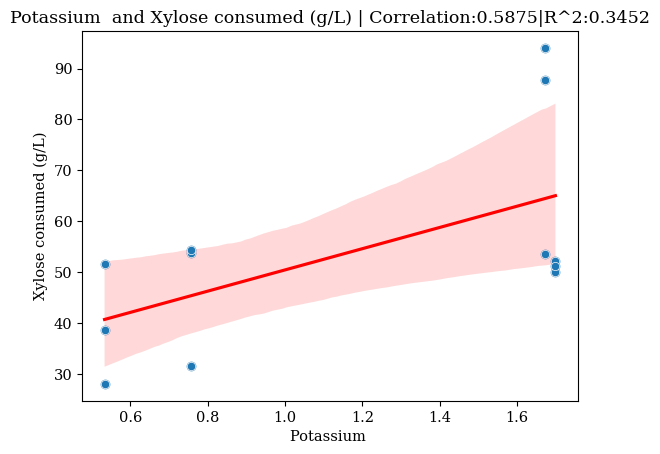

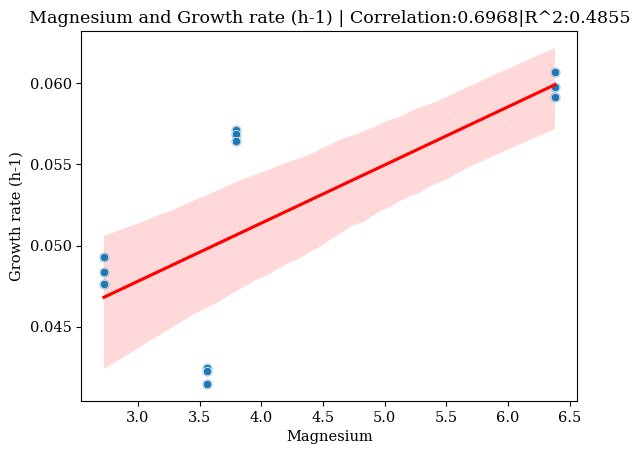

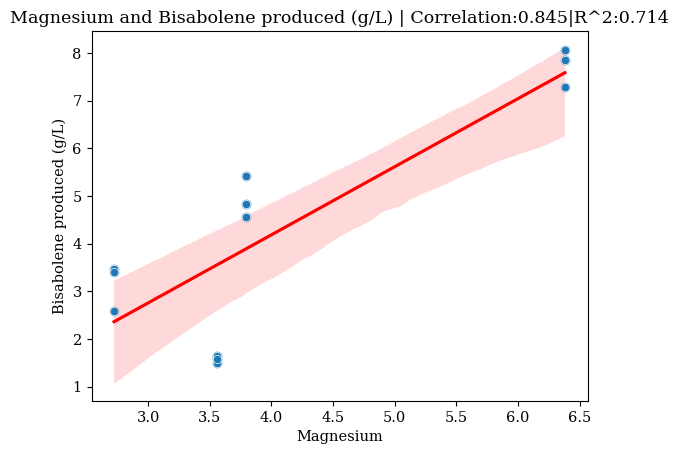

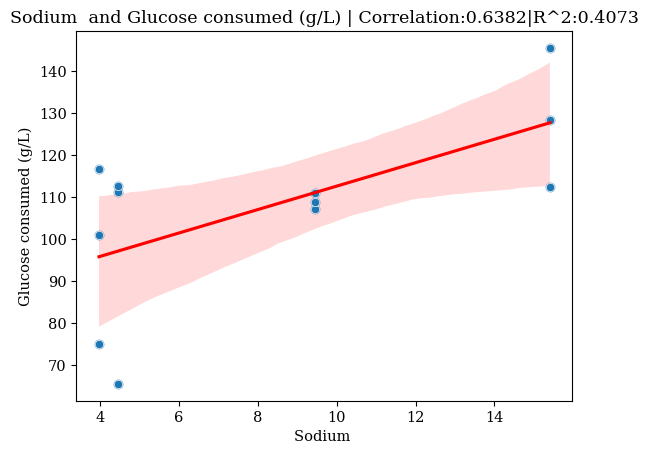

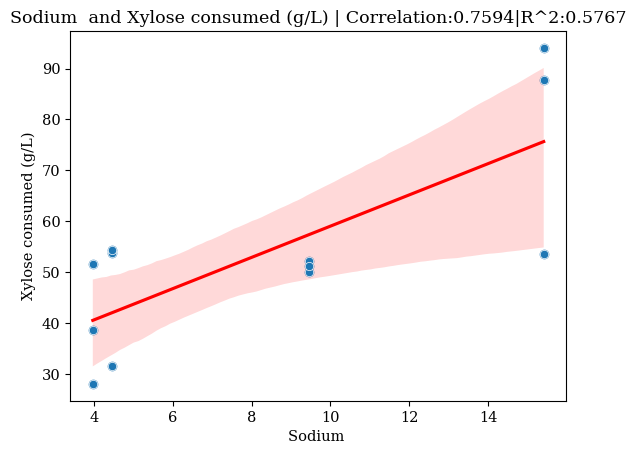

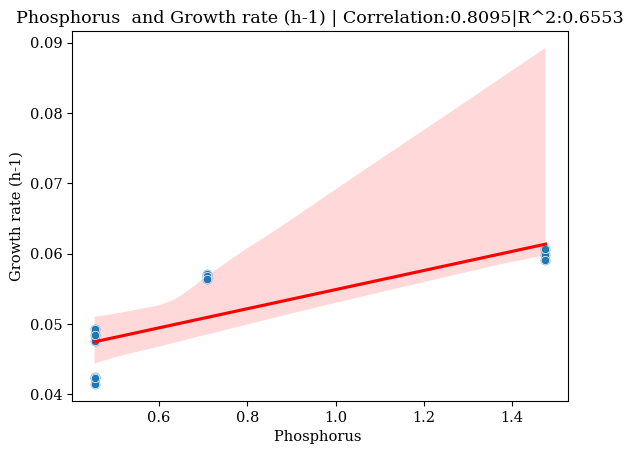

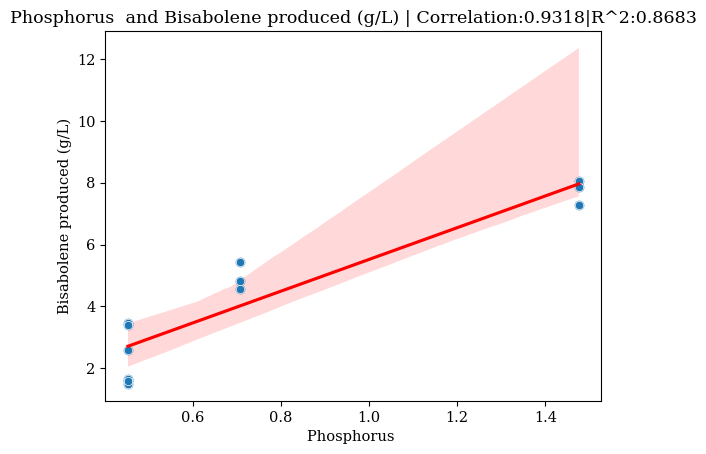

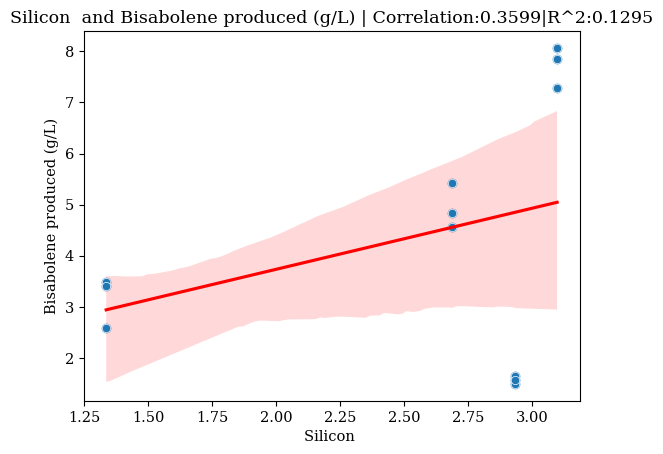

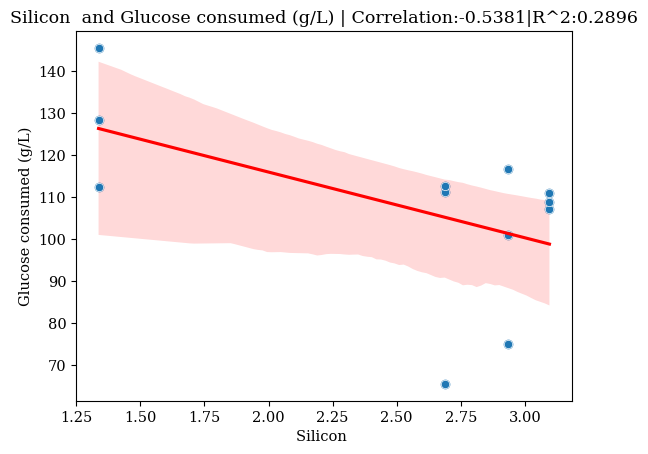

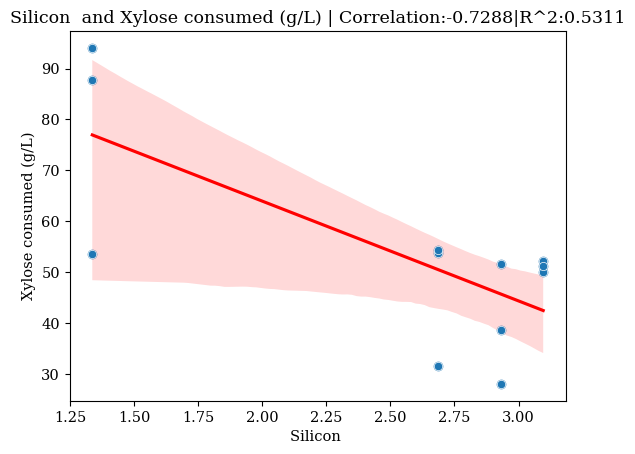

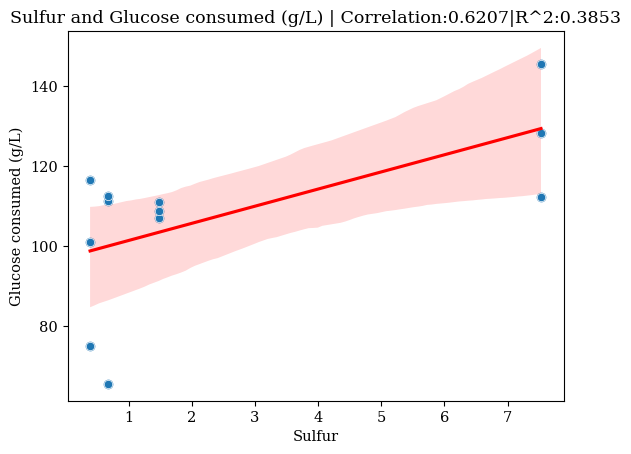

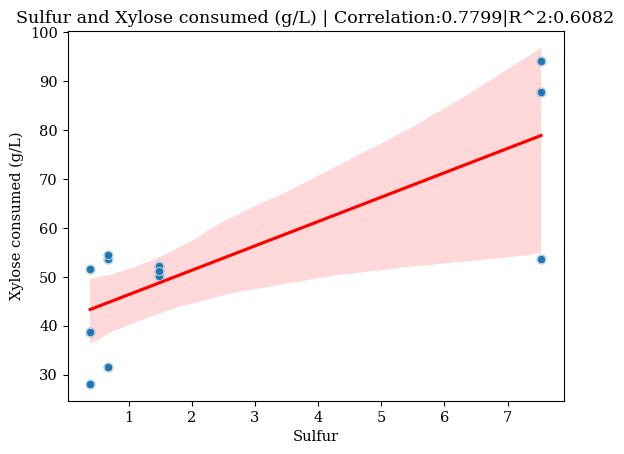

In [ ]:
#Correlation for fractional data between growth rate, sugar consumption and bisabolene data to composition of hydrolysate. Correlations with absolute value more than 0.33 shown.
counter = 0
for i in range(len(whole_col)):
  for j in range(len(result_col)):
    col1 = whole_col[i]
    col2 = result_col[j]
    try:
            hydro_comp_fraction.loc[:,col1] = hydro_comp_fraction.loc[:,col1].astype(float)
            result_batch.loc[:,col2] = result_batch.loc[:,col2].astype(float)
    except ValueError:
          continue
    if hydro_comp_fraction[col1].dtype == 'float64' and result_batch[col2].dtype == 'float64':
      correlation = round(ferment_fraction[[col1, col2]].corr().iloc[0,1],4)
      if abs(correlation*correlation) > 0.1:
        counter+=1
        plt.figure()
        sns.regplot(data=ferment_fraction, x=col1, y=col2, line_kws={'color': 'red'})
        plt.title(f'{col1} and {col2} | Correlation:{correlation}|R^2:{np.round(correlation**2,4)}')
        sns.scatterplot(data=ferment_fraction,x=col1,y=col2)
print(counter)

Text(0.5, 1.0, 'Heatmap of Correlations')

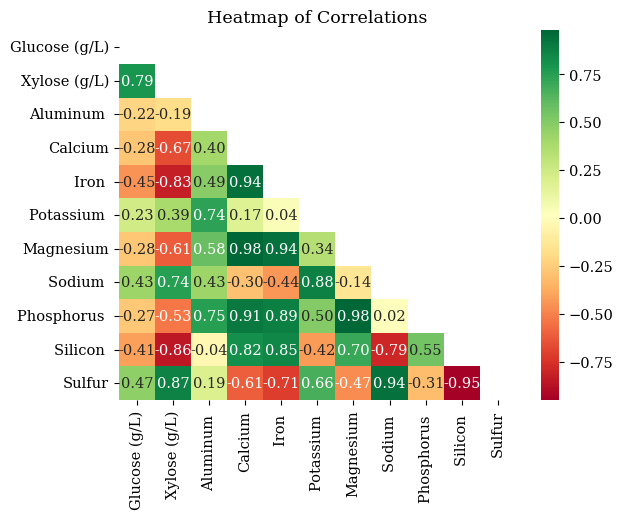

In [ ]:
#all correlations between each column in dataset
float_columns = hydro_comp_fraction.select_dtypes(include=['float64']).columns
corr_matrix = hydro_comp_fraction[float_columns].corr()
#.where(np.abs(corr_matrix) >= 0.2,0)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',mask=mask)
plt.title('Heatmap of Correlations')

Text(0.5, 1.0, 'Heatmap of Correlations')

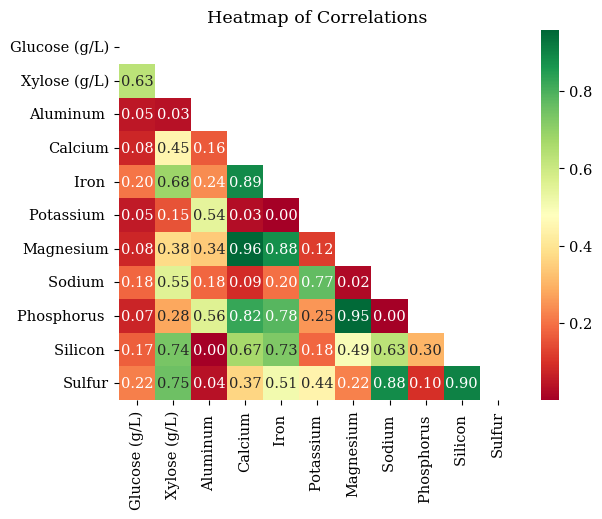

In [ ]:
#all correlations between each column in dataset
float_columns = hydro_comp_fraction.select_dtypes(include=['float64']).columns
corr_matrix = hydro_comp_fraction[float_columns].corr()**2
#.where(np.abs(corr_matrix) >= 0.2,0)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',mask=mask)
plt.title('Heatmap of Correlations')

-----------------------------------
## **Self Heated Data**


In [ ]:
ferment_degrade = ferment[ferment['Feedstock'].isin(['Synthetic media_R1','Synthetic media_R2','Mild self heated_R1','Mild self heated_R2','Moderate self-heated_R1','Moderate self-heated_R2,,Severe self-heated_R1','Severe self-heated_R2'])]
ferment_degrade

Feedstock  Glucose (g/L)  Xylose (g/L)  Aluminum    Calcium  \
16       Synthetic media_R1       88.87572      52.32441        NaN  0.784655   
17       Synthetic media_R2      112.27350      66.10086        NaN  0.784655   
18      Mild self heated_R1      130.93500      71.41134   0.091331  7.441122   
19      Mild self heated_R2      106.74465      58.29435   0.091331  7.441122   
20  Moderate self-heated_R1       71.35044      31.03986   0.104236  6.168927   
23    Severe self-heated_R2       89.69961      31.99425   0.092378  6.452173   

       Iron   Potassium   Magnesium   Sodium   Phosphorus   Silicon   \
16  0.000870    6.393540   3.613977  1.489551     6.393016  0.000000   
17  0.000870    6.393540   3.613977  1.489551     6.393016  0.000000   
18  1.743364    0.789225   5.506782  3.326391     0.493466  2.462097   
19  1.743364    0.789225   5.506782  3.326391     0.493466  2.462097   
20  1.380510    0.682639   3.852679  2.441060     0.389589  2.045180   
23  0.967602    0.819189   3.416776  3.245004     0.447711  2.482430   

       Sulfur  Growth rate (h-1)  Bisabolene produced (g/L)  \
16  36.538286           0.032462                   0.698262   
17  36.538286           0.032371                   0.395067   
18   1.551116           0.037627                   1.051308   
19   1.551116           0.038457                   1.347543   
20   0.485585           0.037913                   1.249885   
23   0.517166           0.047268                   2.414424   

    Glucose consumed (g/L)  Xylose consumed (g/L)  
16                74.18664               24.36609  
17                86.71029               31.37742  
18               119.31963               71.41134  
19                92.96472               58.29435  
20                69.40947               12.08256  
23                89.69961               31.99425

In [ ]:
hydro_comp_degrade = ferment_degrade[['Glucose (g/L)', 'Xylose (g/L)', 'Aluminum ', 'Calcium',
       'Iron ', 'Potassium ', 'Magnesium', 'Sodium ', 'Phosphorus ',
       'Silicon ', 'Sulfur']]
result_batch = ferment_degrade[['Growth rate (h-1)', 'Bisabolene produced (g/L)',
       'Glucose consumed (g/L)', 'Xylose consumed (g/L)']]


<ipython-input-33-b7e573f219a2>:16: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


38


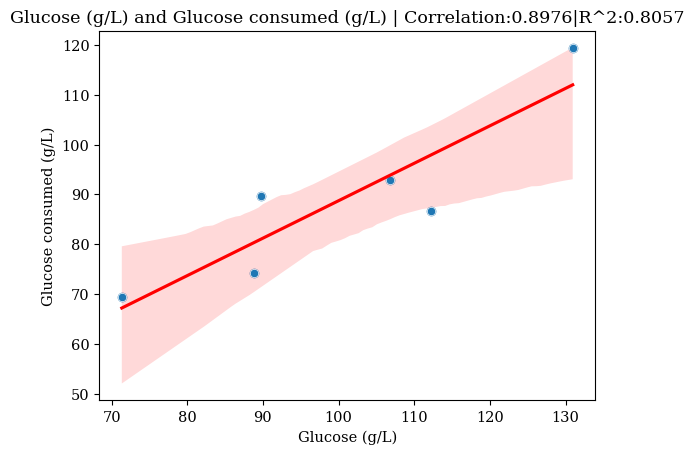

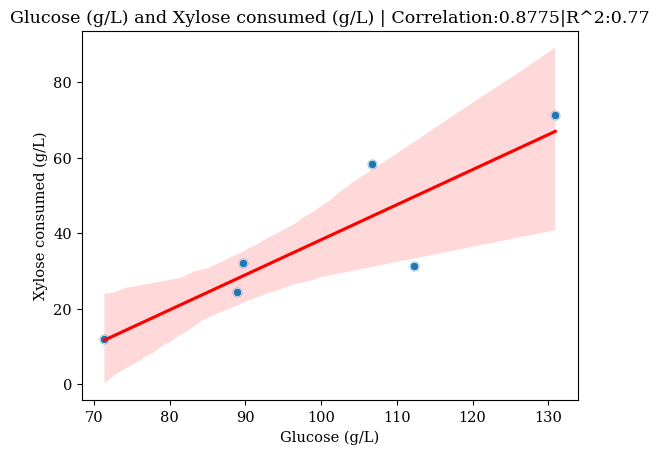

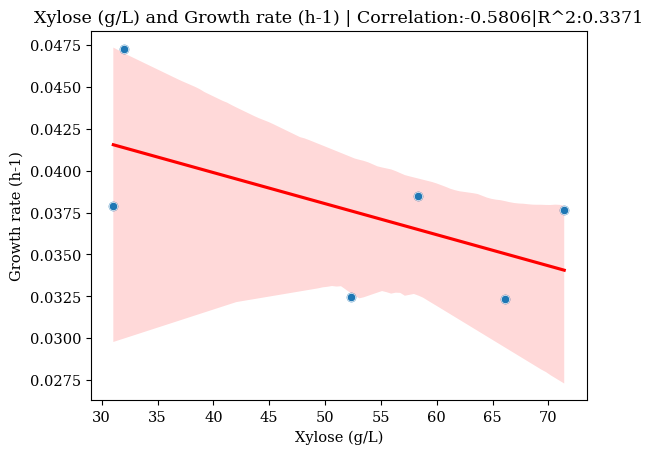

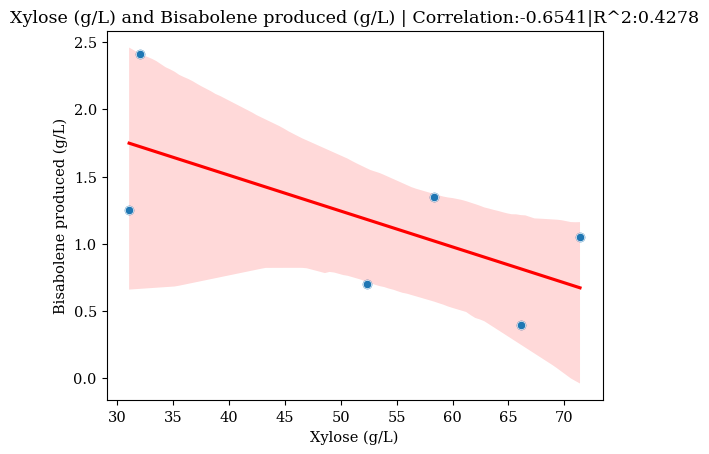

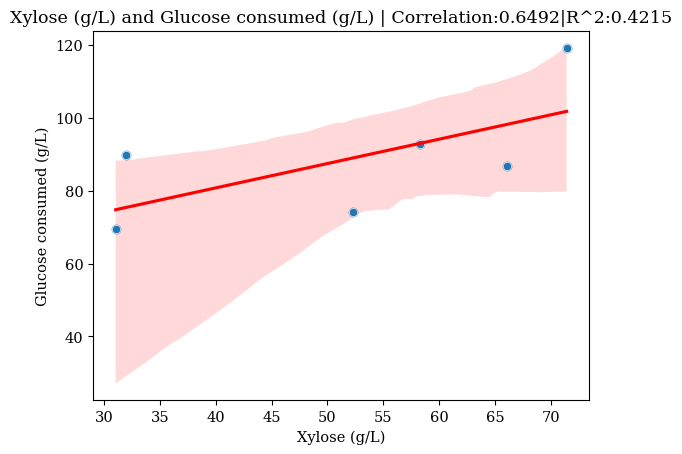

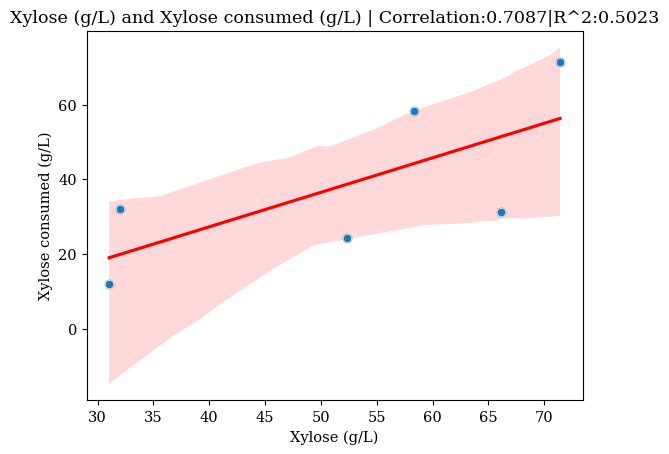

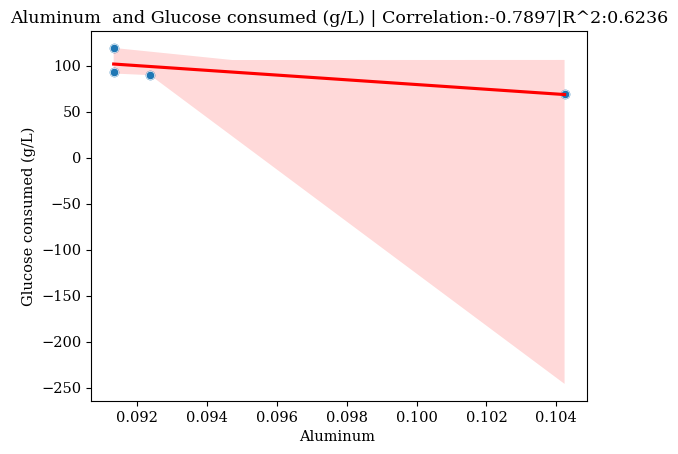

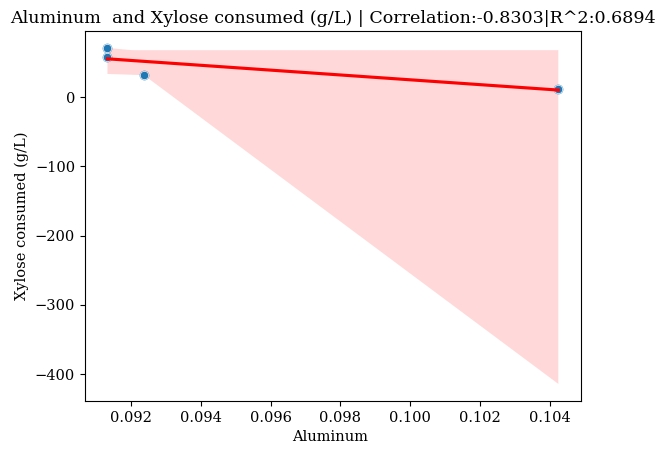

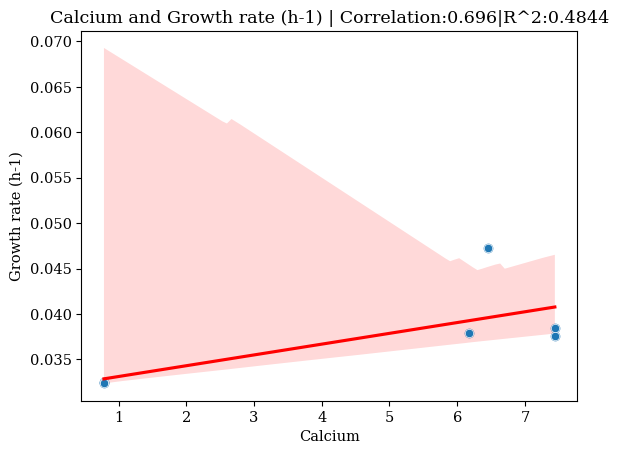

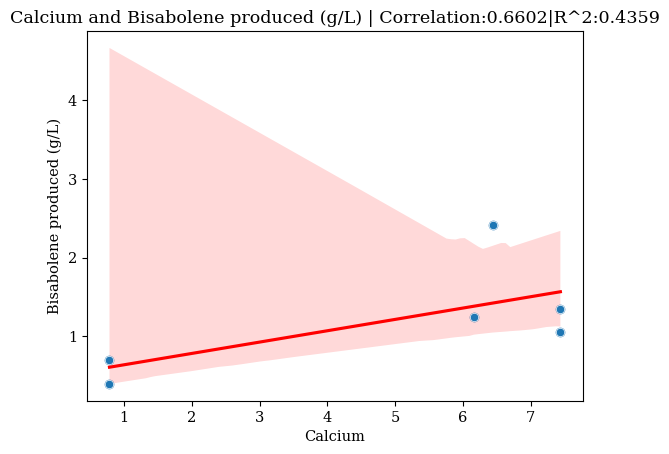

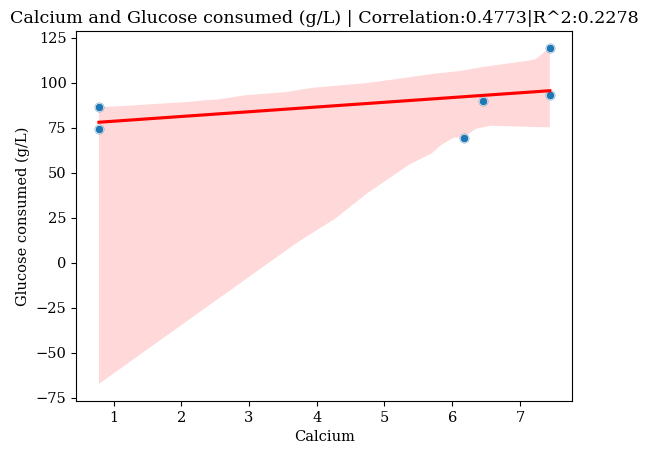

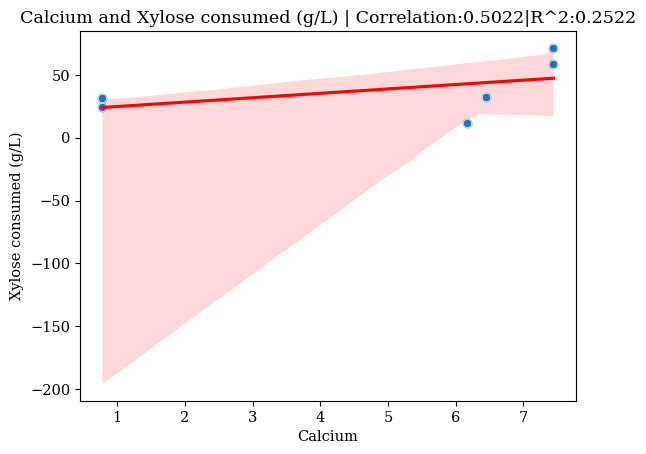

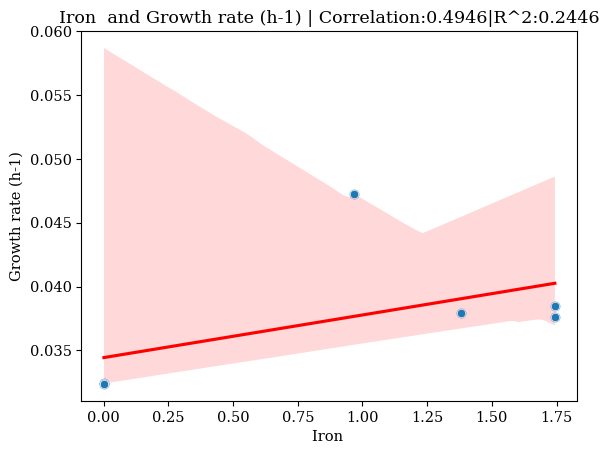

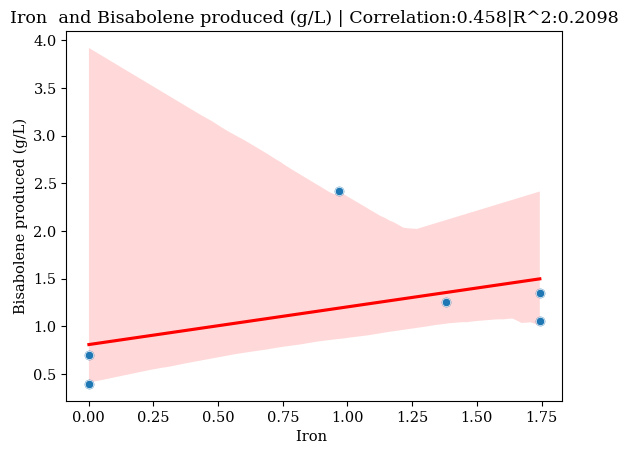

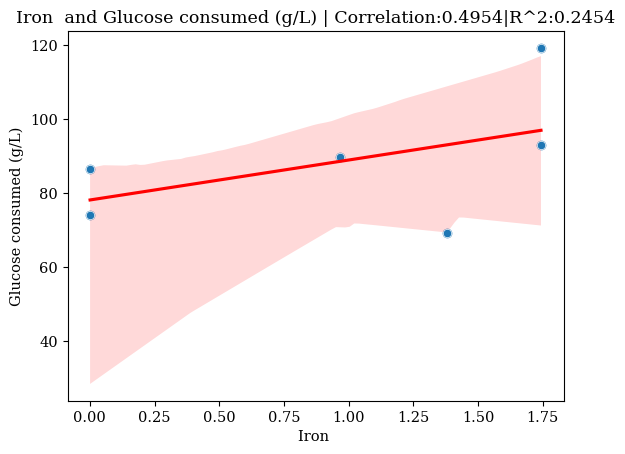

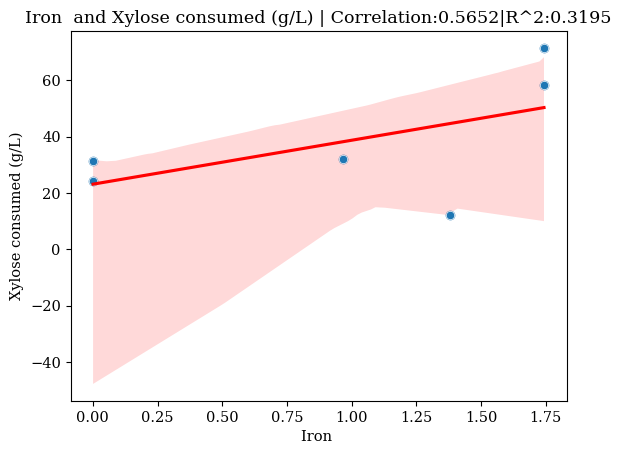

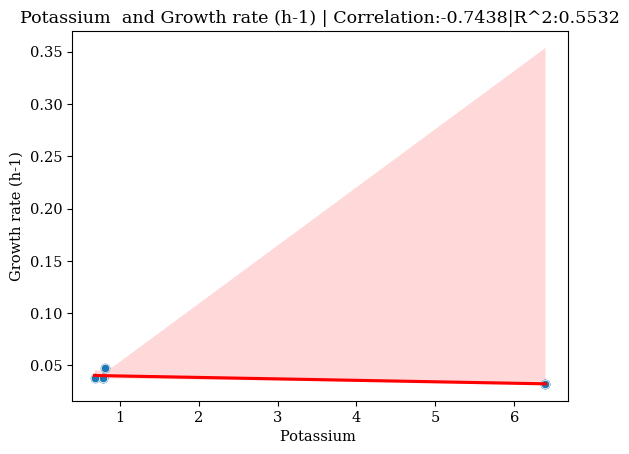

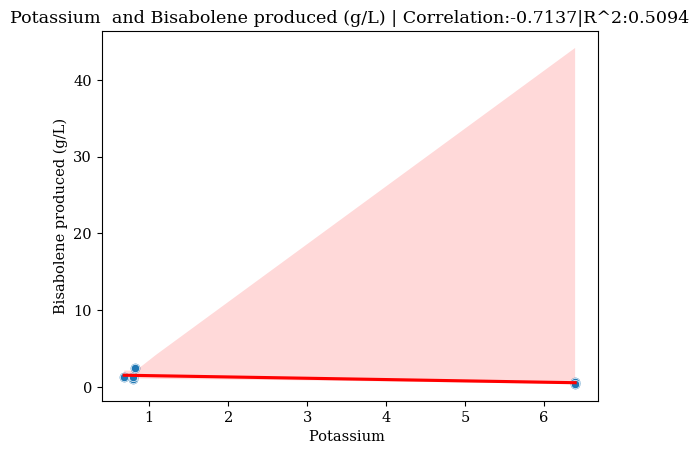

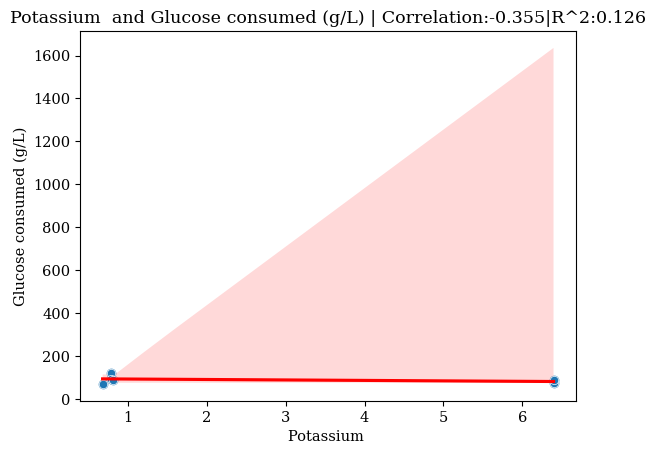

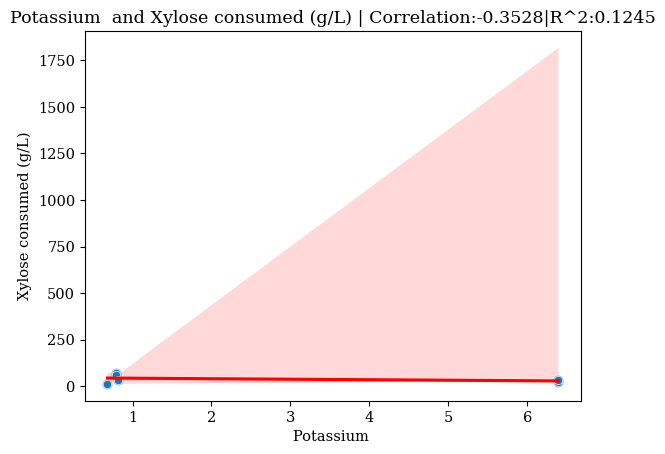

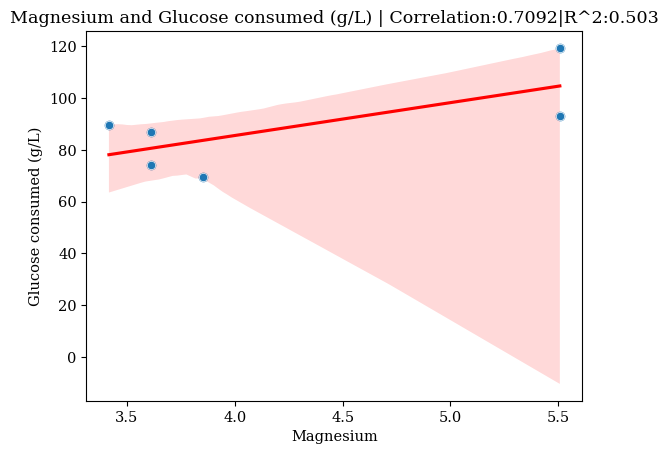

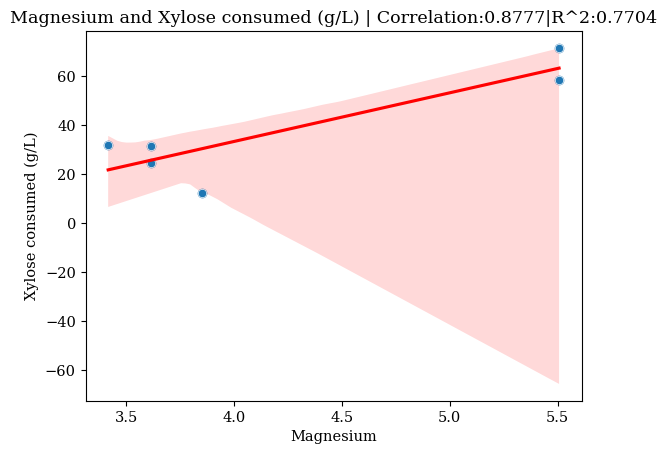

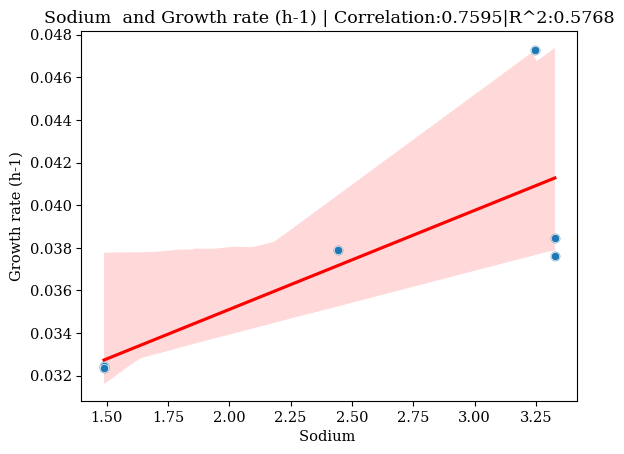

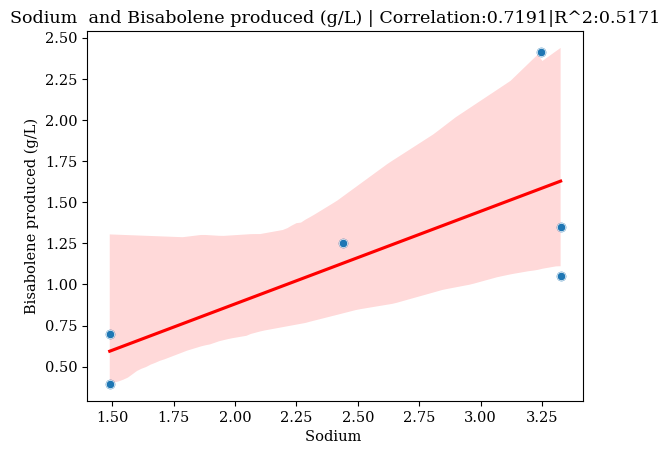

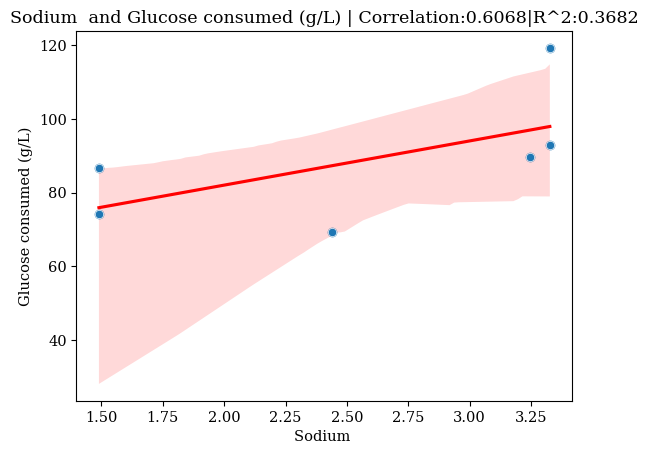

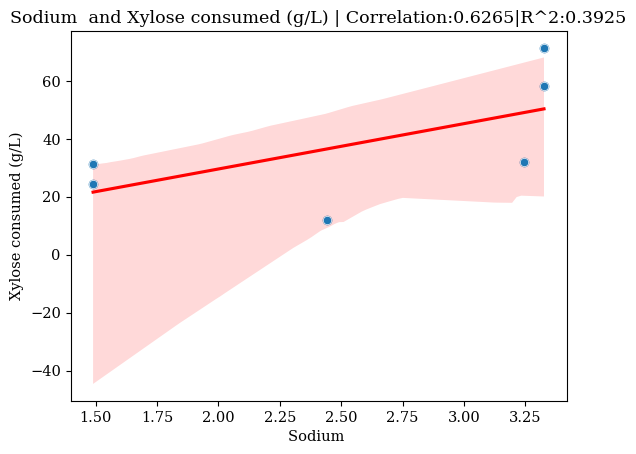

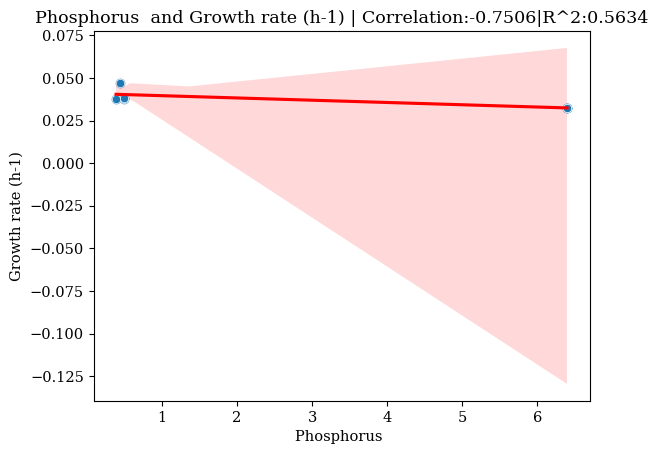

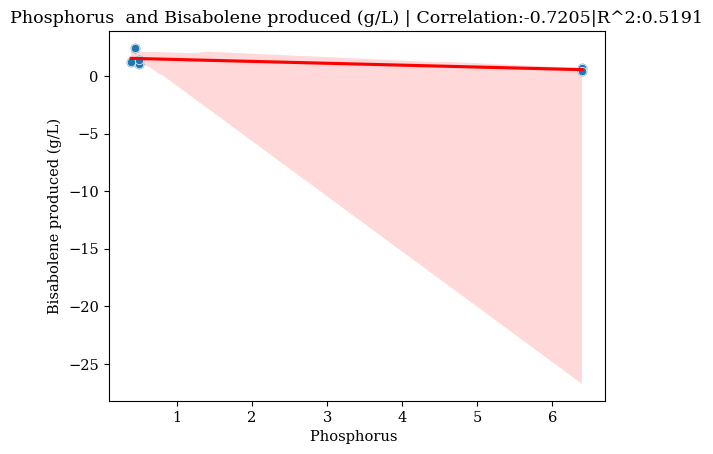

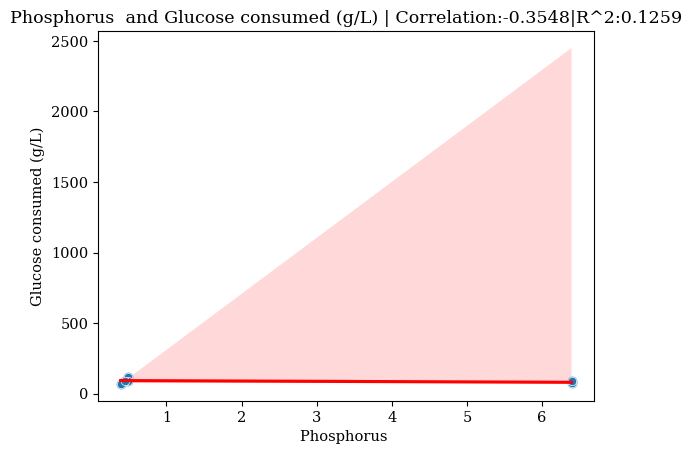

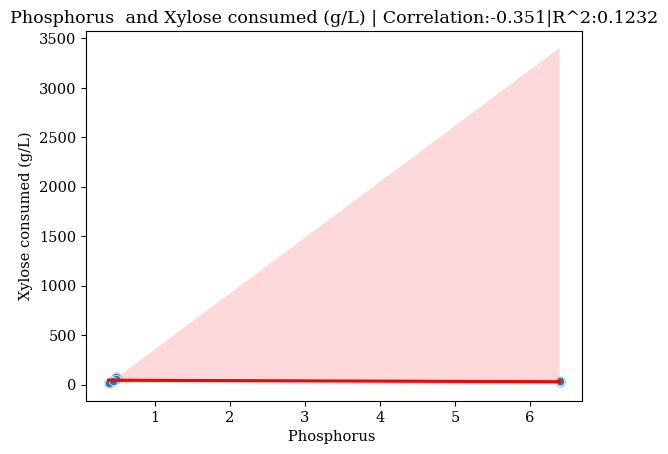

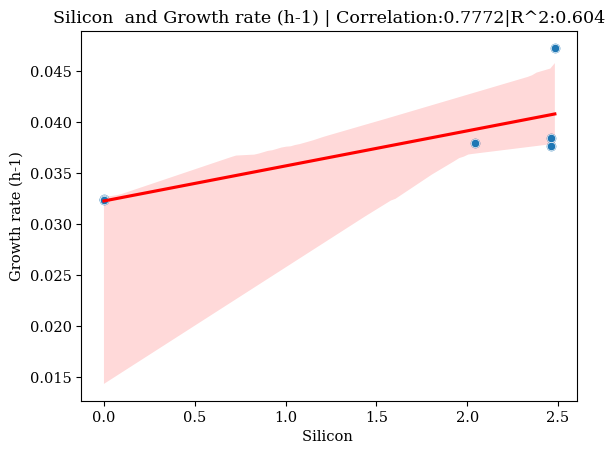

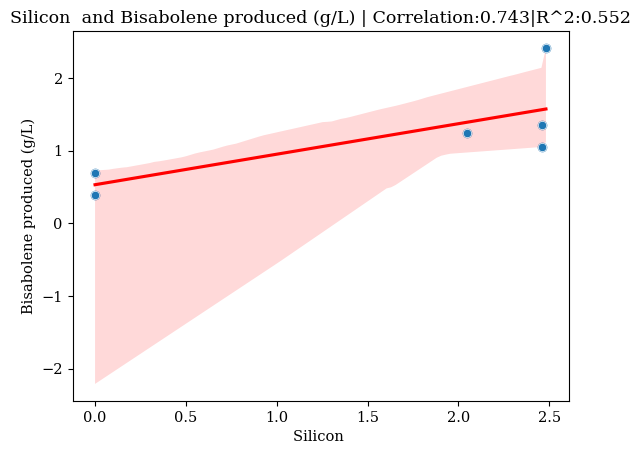

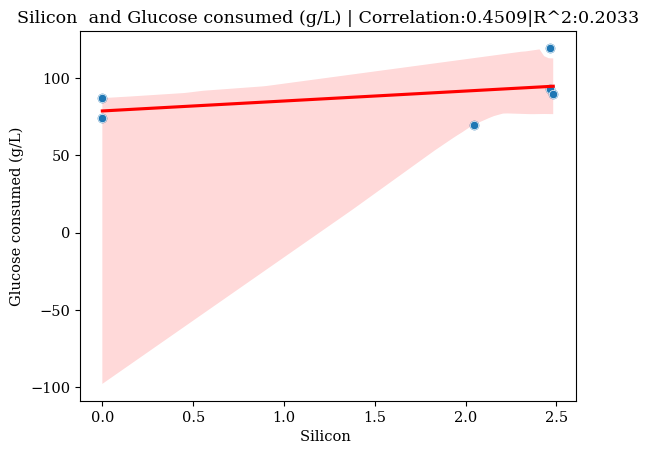

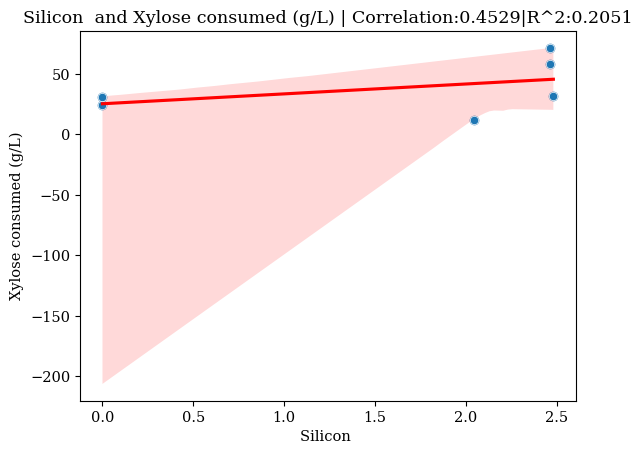

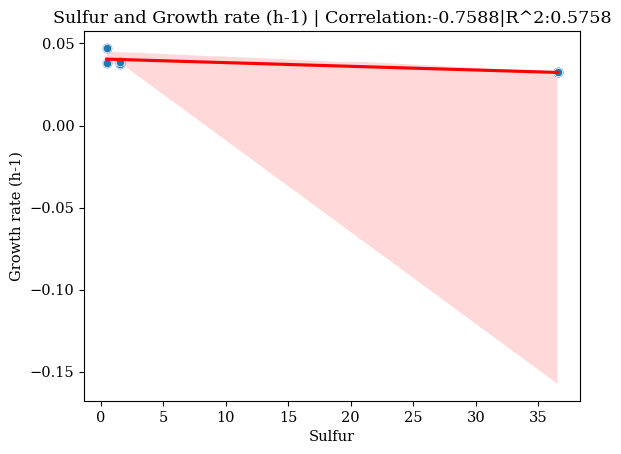

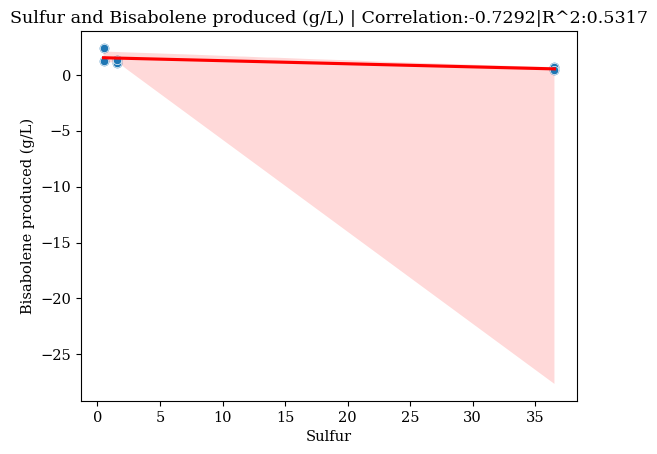

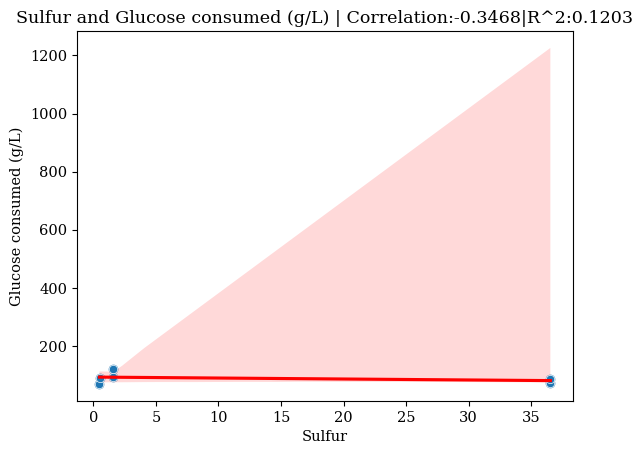

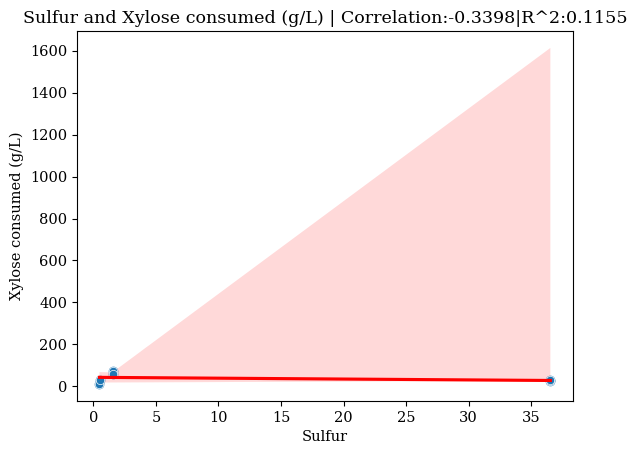

In [ ]:
#Correlation for self degradation data between growth rate, sugar consumption and bisabolene data to composition of hydrolysate. Correlations with absolute value more than 0.33 shown.
counter = 0
for i in range(len(whole_col)):
  for j in range(len(result_col)):
    col1 = whole_col[i]
    col2 = result_col[j]
    try:
            hydro_comp_degrade.loc[:,col1] = hydro_comp_degrade.loc[:,col1].astype(float)
            result_batch.loc[:,col2] = result_batch.loc[:,col2].astype(float)
    except ValueError:
          continue
    if hydro_comp_degrade[col1].dtype == 'float64' and result_batch[col2].dtype == 'float64':
      correlation = round(ferment_degrade[[col1, col2]].corr().iloc[0,1],4)
      if abs(correlation*correlation) > 0.1:
        counter+=1
        plt.figure()
        sns.regplot(data=ferment_degrade, x=col1, y=col2, line_kws={'color': 'red'})
        plt.title(f'{col1} and {col2} | Correlation:{correlation}|R^2:{np.round(correlation**2,4)}')
        sns.scatterplot(data=ferment_degrade,x=col1,y=col2)
print(counter)

Text(0.5, 1.0, 'Heatmap of Correlations')

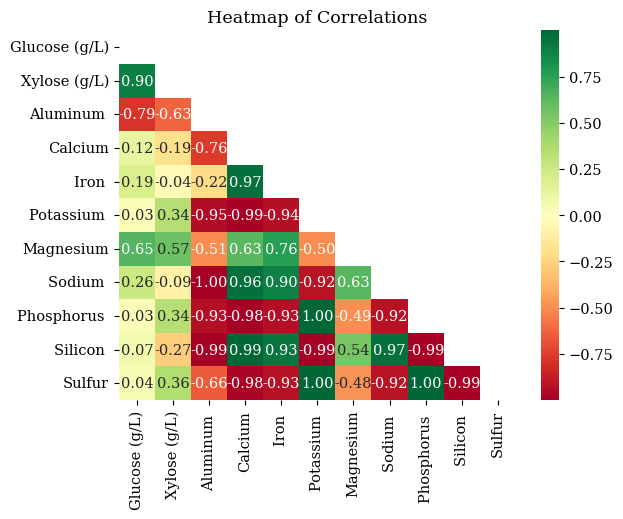

In [ ]:
#all correlations between each column in dataset
float_columns = hydro_comp_degrade.select_dtypes(include=['float64']).columns
corr_matrix = hydro_comp_degrade[float_columns].corr()
#.where(np.abs(corr_matrix) >= 0.2,0)
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='RdYlGn',mask=mask)
plt.title('Heatmap of Correlations')

Text(0.5, 1.0, 'Heatmap of Correlations')

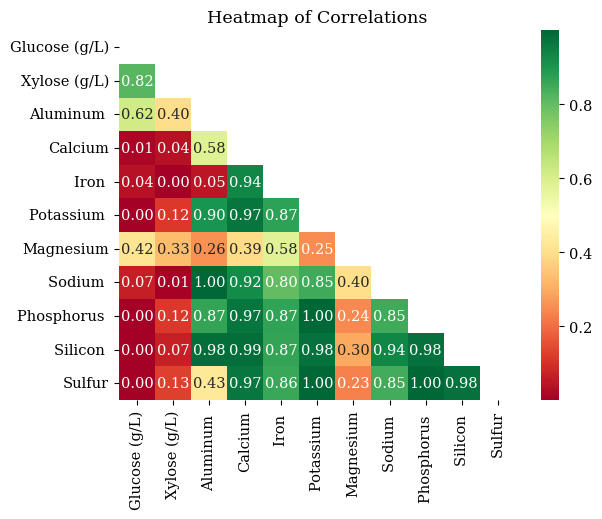

In [ ]:
#all correlations between each column in dataset
float_columns = hydro_comp_degrade.select_dtypes(include=['float64']).columns
r2_matrix = hydro_comp_degrade[float_columns].corr()**2
#.where(np.abs(corr_matrix) >= 0.2,0)
mask = np.triu(np.ones_like(r2_matrix, dtype=bool))
sns.heatmap(r2_matrix, annot=True, fmt='.2f', cmap='RdYlGn',mask=mask)
plt.title('Heatmap of Correlations')